# Milestone 2 Assignment - Capstone Check-in

## Author - Kenji Oman

### Capstone Project Instructions
Select a problem and data sets of particular interest and apply the analytics process to find and report on a solution.

Students will construct a simple dashboard to allow a non-technical user to explore their solution. The data should be read from a suitable persistent data storage, such as an Internet URL or a SQL data base.

The process followed by the students and the grading criteria include:
<ol style="list-style-type: lower-alpha;">
<li>Understand the business problem <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span></li>
<li>Evaluate and explore the available data <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span></li>
<li>Proper data preparation <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span> <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span></li>
<li>Exploration of data and understand relationships <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span> <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span></li>
<li>Perform basic analytics and machine learning, within the scope of the course, on the data.  <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span> <span class="label" style="border-radius: 3px; background-color: slateblue; color: white;">Milestone 3</span> <BR/>For example, classification to predict which employees are most likely to leave the company.</li>
<li>Create a written and/or oral report on the results suitable for a non-technical audience. <span class="label" style="border-radius: 3px; background-color: slateblue; color: white;">Milestone 3</span></li>
</ol>



## Tasks
<img src="https://library.startlearninglabs.uw.edu/DATASCI420/img/Milestone2Sample.PNG" style="float: right; width: 400px;">
For this check-in, you are to:

1). Explicitly state the problem, list sources, and define the methodology: classification, regression, other

2). List data processing steps (psuedo code) including steps from data source collection & preparation, feature engineering & selection, modeling, performance evaluation.

3). Read in the previously generated data file of cleaned up data

4). Perform feature engineering and selection

5). Conduct some preliminary modeling 

6). Identify potential machine learning model(s) to improve performance


# 1. Project Overview

## 1.a. Project Goal
The goal of this project is to predict the type of traffic violations an individual is likely to face in Montgomery County Maryland, given their location, demographics, car type, weather, and amount of daylight.

## 1.b. Data Sources
There are 4 primary data sources in use in this project:
* Traffic violations data [from Kaggle](https://www.kaggle.com/rounak041993/traffic-violations-in-maryland-county/version/1)
* Montgomery County weather data [downloaded from a portal from NOAA](https://www.ncdc.noaa.gov/cdo-web/search)
* Derived daylight values, from time, using the [astral](https://astral.readthedocs.io/en/stable/index.html) package.
* Charge Title/ subtitles, derived from various sources online (used to map the "charges" column of the traffic violations data).

I cleaned/ prepared the weather and daylight data for Milestone 1, while my teammates, Kyle Slyngstad and Tsun Tsai prepared the Traffic violations data, with the charge title/ subtitles pulled by Kyle.

## 1.c Methodology
This is a multi-class classification problem, so let's start with naive bayes

# 2. Data Processing Steps

## 2.a. Data Source Collection and Preparation
1. Load weather data
 1. Convert column names to more intuitive versions
 2. Drop the "_attr" columns, and a few other columns, since they didn't contain useful information or it was confusing what kind of information these columns contain.
 3. Fill NA's with 0 for the binary columns (as these were actually negative results, not missing datapoints)
 4. Drop latitude, longitude, and elelvation (station specific attributes), and aggregate over stations, as a lot of them didn't have different portions of the data (and weather is unlikely to be that different from different locations within a county).
 5. Perform a square root transform of our continuous columns to make them less skewed (they had a long tail of values)

2. Using the date/times of the traffic violations data and the astral package, determine the category of daylight available at that time (day, night, golden hour, and blue hour)
3. Load the Traffic Violations data, which was cleaned by my group members
 1. Using the Charge title/ subtitles collected by Kyle, convert the Charges column
4. Merge all the datasets based off of the date, or date/time information.

## 2.b. Feature Engineering/ Selection
As I was not involved in the curation of the traffic violations data (other than a little bit of time I spent cleaning up the latitutde/ longitude column when I merged the datasets), I'll try to take a look at the current columns a bit more closely and might try to do some cleanup/ feature engineering to what's currently there.  After that, we still need to perform feature selection/ perhaps some additional scaling.

## 2.c. Modeling
Let's first try applying a naive bayes model to see how it does

## 2.d. Performance Evaluation
As this is a multi-class classification algorithm, let's use the accuracy as the primary metric to evaluate the model.

# Load data, data peek, and cleanup
Now, let's load the previously cleaned/ merged data, and start taking a look

In [1]:
# First, load libraries
import copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import category_encoders as ce
from sklearn.preprocessing import StandardScaler
import sklearn.feature_selection as fs
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from IPython.display import display, Markdown

In [2]:
# Now, Specify the data file
SEMI_CLEANED_DATA = 'KenjiKyleTsun-M01-MergedData.csv.gz'

# And load it
df = pd.read_csv(SEMI_CLEANED_DATA, compression='gzip', header=0)

In [3]:
# This is for, during data cleanup, we need to go back to the original data.
# Not needed for our final run-through
#df_bkup = df.copy(deep=True)

In [4]:
#df = df_bkup.copy(deep=True)

In [5]:
# And peek at it
with pd.option_context('max_columns', 10000):
    display(df.head())
    display(df.describe(include='all'))

,DateTime_of_Stop,Date_Of_Stop,Time_Of_Stop,SubAgency,Latitude,Longitude,Belts,Personal_Injury,Property_Damage,Fatal,Commercial_License,HAZMAT,Commercial_Vehicle,Alcohol,Work_Zone,State,VehicleType,Year,Make,Model,Color,Violation_Type,Article,Contributed_To_Accident,Race,Gender,Driver_State,DL_State,Arrest_Type,ChargeTitle,ChargeSubtitle,Precipitation,Snow,SnowDepth,MaxTemp,MinTemp,GroundSnowWaterEquivalent,SnowFallWaterEquivalent,Fog,Thunder,SleetIceSnowPellets,Hail,GlazeRime,HighWinds,daylight
0,2017-08-29 10:19:00,2017-08-29,10:19:00,district2,38.981725,-77.092757,0,0,0,0,0,0,0,0,0,VA,02 - Automobile,2001.0,TOYOTA,COROLLA,GREEN,Citation,0,0,WHITE,F,VA,VA,A - Marked Patrol,Rules of Road,Failure to Obey Traffic Control Devices,0.5,0.0,0.0,63.0,58.0,0.0,0.0,0,0,0,0,0,0,day
1,2017-08-29 09:22:00,2017-08-29,09:22:00,district3,39.056975,-76.954633,0,0,1,0,0,0,0,0,0,MD,02 - Automobile,1998.0,DODG,DAKOTA,WHITE,Citation,0,0,BLACK,M,MD,MD,A - Marked Patrol,Rules of Road,Failure to Obey Traffic Control Devices,0.5,0.0,0.0,63.0,58.0,0.0,0.0,0,0,0,0,0,0,day
2,2017-08-29 01:56:00,2017-08-29,01:56:00,district6,39.123242,-77.232998,0,0,0,0,0,0,0,0,0,MD,05 - Light Duty Truck,2005.0,FORD,ESCAPE,RED,Citation,0,0,HISPANIC,M,MD,MD,A - Marked Patrol,Licensing,Driving without Proper License,0.5,0.0,0.0,63.0,58.0,0.0,0.0,0,0,0,0,0,0,night
3,2017-08-29 01:56:00,2017-08-29,01:56:00,district6,39.123242,-77.232998,0,0,0,0,0,0,0,0,0,MD,05 - Light Duty Truck,2005.0,FORD,ESCAPE,RED,Citation,0,0,HISPANIC,M,MD,MD,A - Marked Patrol,Licensing,Driving without Proper License,0.5,0.0,0.0,63.0,58.0,0.0,0.0,0,0,0,0,0,0,night
4,2017-08-29 05:21:00,2017-08-29,05:21:00,district4,39.135682,-76.994878,0,0,0,0,0,0,0,0,0,MD,02 - Automobile,2001.0,FORD,EXPLORER,BLACK,Citation,0,0,HISPANIC,M,MD,MD,A - Marked Patrol,Rules of Road,Failure to Obey Traffic Control Devices,0.5,0.0,0.0,63.0,58.0,0.0,0.0,0,0,0,0,0,0,night


,DateTime_of_Stop,Date_Of_Stop,Time_Of_Stop,SubAgency,Latitude,Longitude,Belts,Personal_Injury,Property_Damage,Fatal,Commercial_License,HAZMAT,Commercial_Vehicle,Alcohol,Work_Zone,State,VehicleType,Year,Make,Model,Color,Violation_Type,Article,Contributed_To_Accident,Race,Gender,Driver_State,DL_State,Arrest_Type,ChargeTitle,ChargeSubtitle,Precipitation,Snow,SnowDepth,MaxTemp,MinTemp,GroundSnowWaterEquivalent,SnowFallWaterEquivalent,Fog,Thunder,SleetIceSnowPellets,Hail,GlazeRime,HighWinds,daylight
count,1189162,1189162,1189162,1189162,1.189162e+06,1.189162e+06,1.189162e+06,1.189162e+06,1.189162e+06,1.189162e+06,1.189162e+06,1.189162e+06,1.189162e+06,1.189162e+06,1.189162e+06,1189108,1189162,1.189162e+06,1189106,1188992,1189162,1189162,1.189162e+06,1.189162e+06,1189162,1189162,1189153,1188401,1189162,1189162,1189162,1.189162e+06,1.189162e+06,1.189162e+06,1.189162e+06,1.189162e+06,1.189162e+06,1.189162e+06,1.189162e+06,1.189162e+06,1.189162e+06,1.189162e+06,1.189162e+06,1.189162e+06,1189162
unique,585231,2289,1440,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69,33,NaN,3388,16742,27,4,NaN,NaN,6,3,67,70,19,19,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,2017-04-27 14:36:00,2015-03-17,23:20:00,district4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,02 - Automobile,NaN,TOYOTA,4S,BLACK,Warning,NaN,NaN,WHITE,M,MD,MD,A - Marked Patrol,Rules of Road,Failure to Obey Traffic Control Devices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,day
freq,59,1241,1764,300736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040141,1039176,NaN,133738,132769,238636,580290,NaN,NaN,426068,795087,1073853,1034747,975214,589356,215437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,641801
mean,NaN,NaN,NaN,NaN,3.908295e+01,-7.711095e+01,3.483630e-02,1.114819e-02,1.767379e-02,1.614582e-04,2.959479e-02,9.334304e-05,5.054820e-03,1.573377e-03,1.984591e-04,NaN,NaN,1.992645e+03,NaN,NaN,NaN,NaN,-4.058068e-02,2.251754e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.824652e-01,3.519736e-02,8.987839e-02,6.348582e+01,4.476769e+01,2.665628e-02,1.257803e-02,3.244133e-02,8.887183e-02,1.432269e-02,2.964272e-03,1.097159e-02,5.021183e-03,NaN
std,NaN,NaN,NaN,NaN,6.906007e-02,9.395216e-02,1.833651e-01,1.049948e-01,1.317628e-01,1.270560e-02,1.694667e-01,9.660973e-03,7.091737e-02,3.963461e-02,1.408616e-02,NaN,NaN,1.812065e+02,NaN,NaN,NaN,NaN,2.439014e-01,1.483594e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.725853e-01,1.843962e-01,3.821161e-01,1.734920e+01,1.631489e+01,1.474939e-01,7.400944e-02,1.771692e-01,2.845588e-01,1.188174e-01,5.436440e-02,1.041692e-01,7.068221e-02,NaN
min,NaN,NaN,NaN,NaN,3.824166e+01,-7.940485e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,-1.000000e+00,NaN,NaN,NaN,NaN,-1.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,3.903149e+01,-7.719462e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,2.002000e+03,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,4.950000e+01,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,NaN,NaN,NaN,NaN,3.907334e+01,-7.709332e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,2.006000e+03,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,6.500000e+01,4.450000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
75%,NaN,NaN,NaN,NaN,3.913860e+01,-7.704385e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e

### Remove NAs

In [6]:
# Look at those columns that are missing some information
temp = df.count()
temp[temp != temp.max()], temp.max()

(State           1189108
 Make            1189106
 Model           1188992
 Driver_State    1189153
 DL_State        1188401
 dtype: int64, 1189162)

In [7]:
# Since there aren't too many rows, let's just drop them (we lose only
# ~0.1% of our data)
df.dropna(inplace=True)
df.shape

(1188168, 45)

### Cleanup Target

In [8]:
# As the Charge title/ subtitle will form our target features, let's clean these up a bit
# First, take a look
with pd.option_context('max_columns', 10000):
    display(df[['ChargeTitle', 'ChargeSubtitle']].groupby('ChargeTitle').ChargeSubtitle.value_counts().to_frame().T)

ChargeTitle                      Accident                      \
ChargeSubtitle Failure to Remain on Scene Falsifying Evidence   
ChargeSubtitle                       8578                 119   

ChargeTitle                                Antitheft        \
ChargeSubtitle Driving Uninsured Falsifying Evidence Theft   
ChargeSubtitle                54                1068   174   

ChargeTitle       Business Regulation      Defect                        \
ChargeSubtitle Fuel Transport or Sale Stop Lights Headlights Glass Tint   
ChargeSubtitle                     26       23424      10926       9078   

ChargeTitle                                                             \
ChargeSubtitle Tag Lights Taillights Exhaust System Turn Signals Tires   
ChargeSubtitle       5603       5556            848          586   569   

ChargeTitle                                                                \
ChargeSubtitle Identification Lamp Clearance Lamp Brakes Side Marker Lamp   
ChargeSubtitle                 540            377    374              359   

ChargeTitle                                                              \
ChargeSubtitle Rearview Mirrors Reflectors Back Up Lamp Bumpers Fenders   
ChargeSubtitle              335        238          206     157     152   

ChargeTitle                                                                    \
ChargeSubtitle Hazard Warning Lamp Park Lamp Suspension Fog Lamps Wheels Lugs   
ChargeSubtitle                 144       133        132       126          86   

ChargeTitle                                                                  \
ChargeSubtitle Wheel Alignment Windshield Wiper Speedometer Door Latch Horn   
ChargeSubtitle              58               58          54         42   40   

ChargeTitle                                                          \
ChargeSubtitle Safety Belts Steering External Air Brake Dash Lights   
ChargeSubtitle           35       34                 26          23   

ChargeTitle                                                             \
ChargeSubtitle Hood Catch Emergency Warning Map Low Air Warning Device   
ChargeSubtitle         23                    19                     19   

ChargeTitle                                                              \
ChargeSubtitle Load Cover Fuel System Cap Driver's Seat Floor Lift Axle   
ChargeSubtitle         14          11  10             5     4         4   

ChargeTitle    Federal Regulations                                            \
ChargeSubtitle                Misc Headlights Driving without Proper License   
ChargeSubtitle                7275       3917                            760   

ChargeTitle                                                         \
ChargeSubtitle Commerical Driving Transporting Hazardous Materials   
ChargeSubtitle                189                               29   

ChargeTitle                                          \
ChargeSubtitle Reckless Driving Falsifying Evidence   
ChargeSubtitle                3                   1   

ChargeTitle                                         For-Rent Vehicles  \
ChargeSubtitle Improper Transportation of Cargo Improper Rental Usage   
ChargeSubtitle                                1                   467   

ChargeTitle            Fuel Taxes            Highways         Insurance  \
ChargeSubtitle Commercial Driving Unauthorized Access Driving Uninsured   
ChargeSubtitle                 17                   3             11806   

ChargeTitle                                             Licensing  \
ChargeSubtitle Falsifying Evidence Driving without Proper License   
ChargeSubtitle                   6                         167400   

ChargeTitle                                          Mass Transit  \
ChargeSubtitle Commerical Driving Commercial Driving Mass Transit   
ChargeSubtitle                178                 50           78   

ChargeTitle    Motor Vehicle Administration Penalties Powers of Authorities  \
Charge

In [9]:
# First, let's add the charge title to the subtitle column, and remove spaces
df.loc[:, 'ChargeSubtitle'] = (df.ChargeTitle + '_' + df.ChargeSubtitle).str.replace(' ', '')
# Also, if we have any apostrophes or dashes in ChargeSubtitle, just get rid of them
df.loc[:, 'ChargeSubtitle'] = df.ChargeSubtitle.str.replace('\'', '').str.replace('-', '')

# And take a look at it again
with pd.option_context('max_columns', 1000):
    display(df.groupby('ChargeTitle').ChargeSubtitle.value_counts(dropna=False).to_frame().T)

ChargeTitle                           Accident                              \
ChargeSubtitle Accident_FailuretoRemainonScene Accident_FalsifyingEvidence   
ChargeSubtitle                            8578                         119   

ChargeTitle                                                 Antitheft  \
ChargeSubtitle Accident_DrivingUninsured Antitheft_FalsifyingEvidence   
ChargeSubtitle                        54                         1068   

ChargeTitle                                       Business Regulation  \
ChargeSubtitle Antitheft_Theft BusinessRegulation_FuelTransportorSale   
ChargeSubtitle             174                                     26   

ChargeTitle               Defect                                     \
ChargeSubtitle Defect_StopLights Defect_Headlights Defect_GlassTint   
ChargeSubtitle             23424             10926             9078   

ChargeTitle                                                             \
ChargeSubtitle Defect_TagLights Defect_Taillights Defect_ExhaustSystem   
ChargeSubtitle             5603              5556                  848   

ChargeTitle                                                               \
ChargeSubtitle Defect_TurnSignals Defect_Tires Defect_IdentificationLamp   
ChargeSubtitle                586          569                       540   

ChargeTitle                                                              \
ChargeSubtitle Defect_ClearanceLamp Defect_Brakes Defect_SideMarkerLamp   
ChargeSubtitle                  377           374                   359   

ChargeTitle                                                                \
ChargeSubtitle Defect_RearviewMirrors Defect_Reflectors Defect_BackUpLamp   
ChargeSubtitle                    335               238               206   

ChargeTitle                                                            \
ChargeSubtitle Defect_Bumpers Defect_Fenders Defect_HazardWarningLamp   
ChargeSubtitle            157            152                      144   

ChargeTitle                                                       \
ChargeSubtitle Defect_ParkLamp Defect_Suspension Defect_FogLamps   
ChargeSubtitle             133               132             126   

ChargeTitle                                                                    \
ChargeSubtitle Defect_WheelsLugs Defect_WheelAlignment Defect_WindshieldWiper   
ChargeSubtitle                86                    58                     58   

ChargeTitle                                                     \
ChargeSubtitle Defect_Speedometer Defect_DoorLatch Defect_Horn   
ChargeSubtitle                 54               42          40   

ChargeTitle                                                                \
ChargeSubtitle Defect_SafetyBelts Defect_Steering Defect_ExternalAirBrake   
ChargeSubtitle                 35              34                      26   

ChargeTitle                                                                   \
ChargeSubtitle Defect_DashLights Defect_HoodCatch Defect_EmergencyWarningMap   
ChargeSubtitle                23               23                         19   

ChargeTitle                                                                   \
ChargeSubtitle Defect_LowAirWarningDevice Defect_LoadCover Defect_FuelSystem   
ChargeSubtitle                         19               14                11   

ChargeTitle                                                                \
ChargeSubtitle Defect_Cap Defect_DriversSeat Defect_Floor Defect_LiftAxle   
ChargeSubtitle         10                  5            4               4   

ChargeTitle        Federal Regulations                                \
ChargeSubtitle FederalRegulations_Misc FederalRegulations_Headlights   
ChargeSubtitle                    7275                          3917   

ChargeTitle                                                    \
ChargeSubtitle FederalRegulations_DrivingwithoutProperLicense   
ChargeSubtitle                          

In [10]:
# Now, create a Dictionary with values to update map the charge subtitle field to
# Basic logic: Keep Rules of Road and Vehicle Registration separate, as these are
# things that the driver can control per trip/ are easily visible.
# For Defects (also easily visible), keep those related to lights separate from
# other defects, as lights are more easily seen at night, while others are more
# easily seen in the day, and clump all Vehicle Equipment violations in with other
# defects.  For everything else, clump into "Other". Call this cleaned up column
# "Charge" and drop the previous Charge columns
charges = {
    **{x: 'LightLampSignalDefect' for x in df.ChargeSubtitle[(df.ChargeTitle == 'Defect') &
                                                             df.ChargeSubtitle.str.contains('[Ll]ights|[Ll]amp|Signal')].unique()},
    **{x: 'OtherDefect' for x in df.ChargeSubtitle[(df.ChargeTitle == 'Defect') &
                                                   ~df.ChargeSubtitle.str.contains('[Ll]ights|[Ll]amp|Signal')].unique()},
    **{x: 'OtherDefect' for x in df.ChargeSubtitle[df.ChargeTitle == 'Vehicle Equipment']},
}
df.loc[df.ChargeTitle.isin(['Rules of Road', 'Vehicle Registration']), 'Charge'] = df.loc[df.ChargeTitle.isin(['Rules of Road', 'Vehicle Registration']), 'ChargeSubtitle']
df.loc[df.Charge.isna(), 'Charge'] = df.loc[df.Charge.isna() & df.ChargeSubtitle.isin(charges.keys()), 'ChargeSubtitle'].apply(lambda x: charges[x] if x in charges.keys() else x)
df.loc[:, 'Charge'] = df.Charge.fillna('Other')

In [11]:
# Now, if we take a look at the Charge column
df.Charge.value_counts()

RulesofRoad_FailuretoObeyTrafficControlDevices      215335
VehicleRegistration_ImproperRegistrationPlates      203501
Other                                               203352
RulesofRoad_Speeding                                193100
OtherDefect                                         144316
LightLampSignalDefect                                48003
RulesofRoad_DistractedDriving                        35472
RulesofRoad_DUI                                      35355
RulesofRoad_RecklessDriving                          21231
RulesofRoad_ImproperLaneChange                       17015
RulesofRoad_WrongSideofRoad                          14580
RulesofRoad_Misc                                     10019
RulesofRoad_ImproperParking                           8165
RulesofRoad_Jaywalking                                6554
RulesofRoad_ImproperRoadTurn                          5914
RulesofRoad_FailuretoSignalTurn                       5477
RulesofRoad_Tailgating                                53

In [12]:
# Let's take everything under the LightLampSignal defect, and clump them into RulesofRoad_Other
df.loc[~df.Charge.isin(['RulesofRoad_FailuretoObeyTrafficControlDevices', 'Other',
                       'VehicleRegistration_ImproperRegistrationPlates',
                        'RulesofRoad_Speeding', 'OtherDefect', 'LightLampSignalDefect']),
       'Charge'] = 'RulesofRoad_Other'
# Also, rename some to make them shorter/ easier to read/write
df = df.replace(to_replace={'Charge': {
    'RulesofRoad_FailuretoObeyTrafficControlDevices': 'FailuretoObeyTrafficControlDevices',
    'VehicleRegistration_ImproperRegistrationPlates': 'ImproperPlatesRegistration',
    'RulesofRoad_Speeding': 'Speeding'
}})
df.Charge.value_counts()

FailuretoObeyTrafficControlDevices    215335
ImproperPlatesRegistration            203501
Other                                 203352
Speeding                              193100
RulesofRoad_Other                     180561
OtherDefect                           144316
LightLampSignalDefect                  48003
Name: Charge, dtype: int64

In [13]:
# Looks pretty good!  Now, let's drop the other charge columns, and clean up a few more
# column names, then take another look at the data
df.drop(columns=['ChargeTitle', 'ChargeSubtitle'], inplace=True, errors='ignore')
df.rename(columns={x: ('Vehicle' + x) for x in ['State', 'Year', 'Make', 'Model', 'Color']}, inplace=True)
with pd.option_context('max_columns', 1000):
    display(df.head())

,DateTime_of_Stop,Date_Of_Stop,Time_Of_Stop,SubAgency,Latitude,Longitude,Belts,Personal_Injury,Property_Damage,Fatal,Commercial_License,HAZMAT,Commercial_Vehicle,Alcohol,Work_Zone,VehicleState,VehicleType,VehicleYear,VehicleMake,VehicleModel,VehicleColor,Violation_Type,Article,Contributed_To_Accident,Race,Gender,Driver_State,DL_State,Arrest_Type,Precipitation,Snow,SnowDepth,MaxTemp,MinTemp,GroundSnowWaterEquivalent,SnowFallWaterEquivalent,Fog,Thunder,SleetIceSnowPellets,Hail,GlazeRime,HighWinds,daylight,Charge
0,2017-08-29 10:19:00,2017-08-29,10:19:00,district2,38.981725,-77.092757,0,0,0,0,0,0,0,0,0,VA,02 - Automobile,2001.0,TOYOTA,COROLLA,GREEN,Citation,0,0,WHITE,F,VA,VA,A - Marked Patrol,0.5,0.0,0.0,63.0,58.0,0.0,0.0,0,0,0,0,0,0,day,FailuretoObeyTrafficControlDevices
1,2017-08-29 09:22:00,2017-08-29,09:22:00,district3,39.056975,-76.954633,0,0,1,0,0,0,0,0,0,MD,02 - Automobile,1998.0,DODG,DAKOTA,WHITE,Citation,0,0,BLACK,M,MD,MD,A - Marked Patrol,0.5,0.0,0.0,63.0,58.0,0.0,0.0,0,0,0,0,0,0,day,FailuretoObeyTrafficControlDevices
2,2017-08-29 01:56:00,2017-08-29,01:56:00,district6,39.123242,-77.232998,0,0,0,0,0,0,0,0,0,MD,05 - Light Duty Truck,2005.0,FORD,ESCAPE,RED,Citation,0,0,HISPANIC,M,MD,MD,A - Marked Patrol,0.5,0.0,0.0,63.0,58.0,0.0,0.0,0,0,0,0,0,0,night,Other
3,2017-08-29 01:56:00,2017-08-29,01:56:00,district6,39.123242,-77.232998,0,0,0,0,0,0,0,0,0,MD,05 - Light Duty Truck,2005.0,FORD,ESCAPE,RED,Citation,0,0,HISPANIC,M,MD,MD,A - Marked Patrol,0.5,0.0,0.0,63.0,58.0,0.0,0.0,0,0,0,0,0,0,night,Other
4,2017-08-29 05:21:00,2017-08-29,05:21:00,district4,39.135682,-76.994878,0,0,0,0,0,0,0,0,0,MD,02 - Automobile,2001.0,FORD,EXPLORER,BLACK,Citation,0,0,HISPANIC,M,MD,MD,A - Marked Patrol,0.5,0.0,0.0,63.0,58.0,0.0,0.0,0,0,0,0,0,0,night,FailuretoObeyTrafficControlDevices


## Other Data Peek/ cleanup strategy

In [14]:
# Take a look at all the other traffic violations data
temp = []
for col in df.loc[:, 'SubAgency':'Arrest_Type'].columns:
    temp.append(df[col].value_counts(dropna=False).reset_index().rename(columns={'index': col, col: col + '_cnt'}).head(10))

with pd.option_context('max_columns', 10000):
    display(pd.concat(temp, axis=1))

,SubAgency,SubAgency_cnt,Latitude,Latitude_cnt,Longitude,Longitude_cnt,Belts,Belts_cnt,Personal_Injury,Personal_Injury_cnt,Property_Damage,Property_Damage_cnt,Fatal,Fatal_cnt,Commercial_License,Commercial_License_cnt,HAZMAT,HAZMAT_cnt,Commercial_Vehicle,Commercial_Vehicle_cnt,Alcohol,Alcohol_cnt,Work_Zone,Work_Zone_cnt,VehicleState,VehicleState_cnt,VehicleType,VehicleType_cnt,VehicleYear,VehicleYear_cnt,VehicleMake,VehicleMake_cnt,VehicleModel,VehicleModel_cnt,VehicleColor,VehicleColor_cnt,Violation_Type,Violation_Type_cnt,Article,Article_cnt,Contributed_To_Accident,Contributed_To_Accident_cnt,Race,Race_cnt,Gender,Gender_cnt,Driver_State,Driver_State_cnt,DL_State,DL_State_cnt,Arrest_Type,Arrest_Type_cnt
0,district4,300509.0,39.045425,575,-76.990737,535,0.0,1146800.0,0.0,1174936.0,0.0,1167169.0,0.0,1187976.0,0.0,1153055.0,0.0,1188057.0,0.0,1182166.0,0.0,1186297.0,0.0,1187932.0,MD,1039391,02 - Automobile,1038360,2006.0,73278,TOYOTA,133662,4S,132742,BLACK,238469,Warning,580047.0,0.0,1115495.0,0.0,1161413.0,WHITE,425884.0,M,794287.0,MD,1072999,MD,1034594,A - Marked Patrol,974299
1,district3,243718.0,39.046277,434,-76.990695,439,1.0,41368.0,1.0,13232.0,1.0,20999.0,1.0,192.0,1.0,35113.0,1.0,111.0,1.0,6002.0,1.0,1871.0,1.0,236.0,VA,49264,05 - Light Duty Truck,67010,2007.0,72832,HONDA,126529,TK,77867,SILVER,217887,Citation,547670.0,-1.0,60471.0,1.0,26755.0,BLACK,375738.0,F,392530.0,DC,37914,VA,39444,Q - Marked Laser,116192
2,district2,179202.0,39.109775,328,-76.910440,327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DC,30003,28 - Other,22993,2005.0,71773,FORD,111540,ACCORD,43365,WHITE,182252,ESERO,59617.0,1.0,12202.0,NaN,NaN,HISPANIC,249704.0,U,1351.0,VA,36609,DC,38510,B - Unmarked Patrol,37081
3,district6,156403.0,39.005618,268,-77.012328,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XX,9591,03 - Station Wagon,19337,2004.0,70705,TOYT,67403,CIVIC,40629,GRAY,129953,SERO,834.0,NaN,NaN,NaN,NaN,ASIAN,69871.0,NaN,NaN,PA,6237,XX,15824,S - License Plate Recognition,12947
4,district1,141050.0,39.110610,256,-76.989798,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,8472,06 - Heavy Duty Truck,11374,2003.0,67428,NISSAN,62633,CAMRY,39767,RED,93298,NaN,NaN,NaN,NaN,NaN,NaN,OTHER,64148.0,NaN,NaN,FL,4198,PA,7446,O - Foot Patrol,11197
5,district5,129839.0,39.057555,241,-76.967827,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FL,5350,01 - Motorcycle,11279,2008.0,64655,HOND,45362,COROLLA,35214,BLUE,86886,NaN,NaN,NaN,NaN,NaN,NaN,NATIVE AMERICAN,2823.0,NaN,NaN,NY,3745,FL,6734,L - Motorcycle,10987
6,districtHQ,37439.0,39.003900,141,-77.048067,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,5000,29 - Unknown,7814,2012.0,63895,CHEV,36413,ALTIMA,22584,GREEN,45033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC,2940,NY,5458,E - Marked Stationary Radar,7623
7,Unknown,8.0,39.149278,136,-77.048058,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC,4495,08 - Recreational Vehicle,3899,2002.0,61651,BMW,32758,2S,20709,GOLD,37736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WV,2549,NC,4216,G - Marked Moving Radar (Stationary),5799
8,NaN,NaN,39.058425,134,-77.036485,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WV,4281,25 - Utility Trailer,1287,2011.0,60196,DODGE,31817,4D,19423,"BLUE, DARK",25144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA,2313,CA,3998,R - Unmarked Laser,5424
9,NaN,NaN,39.077695,132,-77.047983,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,3910,19 - Moped,1230,2013.0,59948,CHEVY,27259,SUV,17244,TAN,24972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NJ,1883,TX,3076,I - Marked Moving Radar (Moving),1919


Looking at the above, it looks like we should drop `arrest type`, as that will likely be highly correlated with the type of charge made, and is not something that the driver can know about in advance before getting caught (so may contribute to target leakage). Likewise, `Contributed to Accident` is something that one can't know, until the accident happens (if we wanted to use this information, we would need to try to quantify the likelihood of contributing to an accident based off of other, fixed demographic information, but we don't have the time to address this).  It is also hard to see how `Article` can be used, as it is also something that is a part of making the charge (what kind of rules the person is charged under), and is not something that a driver would have any control over, before getting caught/ charged.  Similarly, `violation type` is also post-getting caught, but is possibly something that could be related to the kind of charge being made, so **let's take a look at this a bit more**.

If I knew more about cars (or, had more time to research), I could bin the `vehicle make`/ `vehicle model` columns some (not just into foreign/ domestic, but perhaps based on what level of trim the cars are -- entry level car, mid, or luxury).  **Let's take a look at this a bit more** too, but likely, we can't do _too_ much with it (for the sake of time).

`Vehicle type` can also be cleaned up/ binned some more

`Personal Injury`, `Property Damage`, and `Fatal` are additional features that, prior to getting into an accident/ the event occuring, it is unlikely that the driver will know that they would be involved in an accident/ event where one of these occured.

---

**So, as a summary of additional cleaning steps to take on the traffic violations data,**

Drop due to target leakage: `Arrest Type`, `Contributed to acident`, `Article`, `Personal Injury`, `Property Damage`, `Fatal`.

Examine in greater detail `Violation Type` as something that might be used to enhace the `charge` target feature.

Try to clean up/ engineer: `Vehicle State`, `Vehicle Type`, `Vehicle Make`, `Vehicle Model`, and `Vehicle Color`, `Race`, `Gender`, `Driver State`, and `Driver License State`

### Drop Columns

In [15]:
# First, drop the columns we don't want to keep
df.drop(columns=['Arrest_Type', 'Contributed_To_Accident',
                 'Article', 'Personal_Injury', 'Property_Damage',
                 'Fatal'], inplace=True)

### Examine Violation Type

In [16]:
# Now, let's take a look at Violation Type to see if we can gain any
# more information for our target "Charge" column
pd.crosstab(df.Violation_Type, df.Charge)

Charge,FailuretoObeyTrafficControlDevices,ImproperPlatesRegistration,LightLampSignalDefect,Other,OtherDefect,RulesofRoad_Other,Speeding
Violation_Type,,,,,,,
Citation,70680,79027,0,159552,34191,105464,98756
ESERO,0,0,47428,0,12189,0,0
SERO,0,0,575,23,236,0,0
Warning,144655,124474,0,43777,97700,75097,94344


In [17]:
# Looks like ESERO and SERO (orders to fix something with the car) are only given to defects
# with the car (makes sense), while every other charge can be either warning or citation.
# To keep things from getting too complicated, let's just drop the violation type column too.
df.drop(columns='Violation_Type', inplace=True)

### Cleanup columns with the US states

In [18]:
# Now, let's see if we can clean up the state columns some (binning)
temp = []
for col in 'VehicleState DL_State Driver_State'.split():
    temp.append(df[col].value_counts(dropna=False).reset_index().rename(columns={'index': col, col: col + '_cnt'}))
    
with pd.option_context('max_columns', 100):
    display(pd.concat(temp, axis=1).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
VehicleState,MD,VA,DC,XX,PA,FL,TX,NC,WV,NY,NJ,GA,DE,OH,CA,MA,SC,IL,TN,MI,CT,AZ,IN,AL,US,OK,KY,WA,CO,MS,MO,LA,ME,MN,WI,RI,NM,NH,IA,UT,AR,NV,OR,KS,VT,AK,ON,ID,MT,ND,NE,HI,SD,MB,WY,NB,QC,VI,AB,GU,PR,PQ,NS,PE,NF,BC,IT,MH,AS,NaN
VehicleState_cnt,1.03939e+06,49264,30003,9591,8472,5350,5000,4495,4281,3910,3318,2560,2241,1966,1963,1552,1310,1306,1050,975,832,824,778,604,491,455,446,416,397,392,377,372,326,312,304,239,211,210,209,207,203,199,169,146,127,114,111,108,87,85,68,66,54,53,39,35,30,18,12,12,11,8,3,3,2,2,1,1,1,NaN
DL_State,MD,VA,DC,XX,PA,FL,NY,NC,CA,TX,GA,WV,NJ,MA,OH,IL,DE,SC,WA,MI,CT,AZ,CO,TN,US,IN,AL,MO,LA,MN,NM,KY,WI,MS,ME,NV,UT,RI,VI,OR,OK,NH,KS,HI,IA,AR,ON,AK,MT,ID,VT,NE,ND,PR,MB,SD,IT,AB,WY,QC,SK,NB,BC,GU,AS,PQ,PE,NS,MH,NF
DL_State_cnt,1034594,39444,38510,15824,7446,6734,5458,4216,3998,3076,2804,2643,2549,1977,1595,1384,1292,1243,998,960,882,836,825,819,539,514,471,459,451,328,314,314,310,293,289,287,261,260,254,253,237,218,208,174,161,159,149,138,135,127,124,118,106,92,62,48,48,25,24,24,18,18,13,9,7,6,5,5,5,1
Driver_State,MD,DC,VA,PA,FL,NY,NC,WV,CA,NJ,TX,GA,MA,DE,OH,XX,IL,SC,CT,MI,WA,TN,CO,AZ,IN,AL,MO,LA,KY,MS,NM,MN,WI,NV,RI,OK,UT,NH,OR,ON,ME,KS,AR,ND,HI,IA,VT,NE,AK,MT,ID,MB,SD,PR,WY,QC,AB,BC,NF,VI,US,SK,PE,GU,NS,NB,PQ,NaN,NaN,NaN
Driver_State_cnt,1.073e+06,37914,36609,6237,4198,3745,2940,2549,2313,1883,1696,1663,1235,1069,1059,872,805,778,633,612,586,475,458,409,374,323,315,269,217,199,196,189,179,169,156,156,149,142,137,136,132,116,91,88,86,86,81,75,66,60,55,50,28,24,23,21,11,7,6,5,4,3,2,2,1,1,1,NaN,NaN,NaN


We see the vast majority of vehicles/ people are from Maryland, with VA, DC, and PA being the next most common.  Surprisingly, XX is quite common as well (probably indicating a missing value), and there are some people from other countries as well.

Let's, recode XX as `Unkown`, all other non-states as `Foreign`, then for the remaining states, keep MD separate, clump VA, DC, and PA as `Neighbors`, and every other state as `Other`.

In [19]:
# Clean up the state columns
state_cols = 'VehicleState DL_State Driver_State'.split()
df.loc[:, state_cols] = df.loc[:, state_cols].replace({'XX': 'Unknown'})

# Grabbed US States/ Territories from:
# https://www.50states.com/abbreviations.htm
us_states_territories = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
                         'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
                         'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
                         'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
                         'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY',
                         'AS', 'DC', 'FM', 'GU', 'MH', 'MP', 'PW', 'PR', 'VI', 'AE',
                         'AA', 'AE', 'AE', 'AE', 'AP', 'Unknown']

# Now, going through these columns one by one
for col in state_cols:
    # For anything that isn't one of these, set as foreign
    df.loc[~df[col].isin(us_states_territories), col] = 'Foreign'
    
    # Set the neighbors
    df.loc[df[col].isin(['VA', 'DC', 'PA']), col] = 'Neighbors'
    
    # And everything else
    df.loc[~df[col].isin(['MD', 'Unknown', 'Foreign', 'Neighbors']), col] = 'Other'

In [20]:
# Verify our corrections worked
temp = []
for col in 'VehicleState DL_State Driver_State'.split():
    temp.append(df[col].value_counts(dropna=False).reset_index().rename(columns={'index': col, col: col + '_cnt'}))
    
with pd.option_context('max_columns', 100):
    display(pd.concat(temp, axis=1).T)

,0,1,2,3,4
VehicleState,MD,Neighbors,Other,Unknown,Foreign
VehicleState_cnt,1039391,87739,50696,9591,751
DL_State,MD,Neighbors,Other,Unknown,Foreign
DL_State_cnt,1034594,85400,51437,15824,913
Driver_State,MD,Neighbors,Other,Unknown,Foreign
Driver_State_cnt,1072999,80760,33294,872,243


### Clean Vehicle Type

In [21]:
# Now, let's look at the vehicle type column, on left is sorted
# alphabetically, on right is sorted by frequency
pd.concat([df.VehicleType.value_counts().sort_index().reset_index(), df.VehicleType.value_counts().reset_index()], axis=1)

,index,VehicleType,index,VehicleType
0,01 - Motorcycle,11279,02 - Automobile,1038360
1,02 - Automobile,1038360,05 - Light Duty Truck,67010
2,03 - Station Wagon,19337,28 - Other,22993
3,04 - Limousine,701,03 - Station Wagon,19337
4,05 - Light Duty Truck,67010,06 - Heavy Duty Truck,11374
5,06 - Heavy Duty Truck,11374,01 - Motorcycle,11279
6,07 - Truck/Road Tractor,1116,29 - Unknown,7814
7,08 - Recreational Vehicle,3899,08 - Recreational Vehicle,3899
8,09 - Farm Vehicle,96,25 - Utility Trailer,1287
9,10 - Transit Bus,414,19 - Moped,1230


By in large, the vast majority of vehiles are of type "Automobile".  Interestingly, even Police, Ambulance, and Fire Trucks get cited for traffic violations!  However, drivers of these vehicles have more important things to be worrying about than the kind of traffic violation they might get, so let's **drop these instances**.

Also, let's drop the numeric code, as that doesn't help us. Then, combine a few categories:
* Light and Heavy duty trucks and to "Trucks"
* Motorcycle and Moped to "Motorbike"
* Commercial Rig and Truck/ Road Tractor to "Semi"
* Utility Trailer, boat trailer, and tandem trailer to "Trailer"
* Everything else under the new Trailer Category to be clumped in with "Other"

In [22]:
# Let's clean up the Vehicle Type column.  First, drop Ambulance,
# Police, and Fire vehicles
df = df.loc[~df.VehicleType.str.contains('Ambulance|Fire|Police'), :]

# Now, convert the remaining elements to drop the number/ dash/ remove
# spaces
df.loc[:, 'VehicleType'] = df.VehicleType.str.split('-').str[1]\
    .apply(lambda x: ''.join(x.strip().split()))

# Now, combine the trucks
df.loc[df.VehicleType.isin(['LightDutyTruck', 'HeavyDutyTruck']), 'VehicleType'] = 'Truck'

# And the Motorcycle/ Mopeds
df.loc[df.VehicleType.isin(['Motorcycle', 'Moped']), 'VehicleType'] = 'Motorbike'

# And the Semis
df.loc[df.VehicleType.isin(['CommercialRig', 'Truck/RoadTractor']), 'VehicleType'] = 'Semi'

# And the Trailers
df.loc[df.VehicleType.isin(['UtilityTrailer', 'BoatTrailer', 'TandemTrailer']), 'VehicleType'] = 'Trailer'

# And, combine everything else
df.loc[~df.VehicleType.isin(['Automobile', 'Truck', 'StationWagon',
                             'Motorbike', 'RecreatonVehicle', 'Semi',
                             'Trailer', 'Unknown']), 'VehicleType'] = 'Other'

# Double check that we combined things properly
df.VehicleType.value_counts()

Automobile      1038360
Truck             78384
Other             28543
StationWagon      19337
Motorbike         12509
Unknown            7814
Semi               1729
Trailer            1436
Name: VehicleType, dtype: int64

### Cleanup Vehicle Make/Model

In [23]:
# Now, let's look at vehicle make/ model
with pd.option_context('max_columns', 100000):
    display(df.VehicleMake.value_counts().reset_index().T)

0       1       2      3       4      5      6      7     \
index        TOYOTA   HONDA    FORD   TOYT  NISSAN   HOND   CHEV    BMW   
VehicleMake  133660  126525  111516  67403   62633  45361  36411  32758   

              8      9      10     11     12         13       14     15    \
index        DODGE  CHEVY  ACURA   NISS   JEEP  CHEVROLET  HYUNDAI  LEXUS   
VehicleMake  31817  27259  26582  26527  26209      25405    22240  18828   

              16     17     18     19     20     21     22     23        24    \
index         MERZ  MAZDA    GMC    KIA   HYUN   AUDI   VOLK   ACUR  MERCEDES   
VehicleMake  17676  16789  15724  15462  14604  11094  10371  10282     10248   

                 25      26    27    28    29    30     31        32     33    \
index        CHRYSLER  SUBARU  DODG  MITS  CHRY  NONE  VOLVO  INFINITI  BUICK   
VehicleMake     10191   10144  8811  8136  7931  7504   7222      6779   6631   

             34          35    36    37       38          39        40    \
index        MAZD  MITSUBISHI  CADI  SUBA  PONTIAC  VOLKSWAGON  CADILLAC   
VehicleMake  6029        5947  5533  5434     5200        4984      4961   

             41       42     43    44    45      46    47       48     49    \
index          VW  LINCOLN  SCION  MERC  INFI  SATURN  LEXU  MERCURY  VOLKS   
VehicleMake  4858     4688   4517  4510  4503    4352  4334     4134   3833   

             50    51          52    53    54    55    56      57     58    \
index        LEXS  PONT  VOLKSWAGEN  VOLV  TOYO  LINC  MINI  SUZUKI  ISUZU   
VehicleMake  3113  3102        3101  3094  2667  2550  2396    2395   2270   

             59    60        61      62        63          64    65    66    \
index        BUIC  SAAB  INFINITY  JAGUAR  MERCEDEZ  LAND ROVER  OLDS  SATU   
VehicleMake  2181  1902      1745    1528      1448        1383  1205  1123   

             67          68       69    70       71             72    73    \
index         TOY  OLDSMOBILE  PORSCHE  ISUZ  NISSIAN  MERCEDES BENZ  MACK   
VehicleMake  1057         936      903   866      848            846   834   

              74         75     76           77    78        79     80    \
index        TOYOT  CHEVORLET  TOYTA  RANGE ROVER  INTL  PLYMOUTH  HYUND   
VehicleMake    777        767    767          758   754       750    715   

                      81   82      83    84    85    86         87     88    \
index        INTERNATIONAL  GEO  YAMAHA  JAGU  LNDR  PORS  LANDROVER  CHRYS   
VehicleMake            709  696     694   689   686   685        650    642   

             89    90    91   92    93    94    95        96      97    \
index        SCIO  SUZU  FIAT  ISU  STRN  SUZI  PLYM  KAWASAKI  HUMMER   
VehicleMake   633   629   622  602   591   549   519       514     479   

                     98   99         100   101      102   103      104   \
index        FREIGHTLINER  LEX  CHRYSTLER  FRHT  CADILAC  MITZ  HYUNDIA   
VehicleMake           447  445        435   414      412   400      376   

                   105  106   107  108     109    110    111       112   \
index        CHEVEROLET  RAM  HINO  SUB  TAOTAO  MITSU  INFIN  KENWORTH   
VehicleMake         372  359   338  338     337    319    291       265   

               113     114            115   116      117    118   119   120   \
index        SUBURU  TOYTOA  MERCEDES-BENZ  MNNI  CRYSLER  SMART  SATR  YAMA   
VehicleMake     258     257            257   247      227    215   209   207   

             121   122        123     124    125     126   127   128   \
index        HUMM  RANG  MERZ BENZ  MAZADA  TESLA  HYUNDI  SUBU  TOTY   
VehicleMake   194   193        192     187    183     182   181   181   

                  129  130         131  132     133  134  135   136   137   \
index        PETERBILT  CAD  PETERBUILT  MAZ  HYUNDA  INF  SAA  PETE  KAWK   
VehicleMake        177  175         175  174     168  164  164   161   159   

             138       139    140   141    142  143     

In [24]:
# This looks really messy, with many possible encodings
# of the same models. Let's try to clean the top few one by one.
# For Toyota possiblilities
with pd.option_context('max_columns', 10000):
    display(df.VehicleMake[df.VehicleMake.str.contains('T')].value_counts().reset_index().T)
    
df.loc[df.VehicleMake.isin(['TOYT', 'TOYO', 'TOY', 'TOYOT', 'TOYTA', 'TOYTOA', 'TOTY', 'TOTOTA', 'TOYOYA', 'TOYTOTA', 'TOYOA', 'TYOTA', 'TOYOYTA',
                            'TOYOTA SCION', 'TOTOYA', 'TOYATA', 'TOOTA', 'TOYPTA', 'TPYOTA', 'TOTYOTA', 'TOYOTOA', 'TOYORA', 'TOYOTSA', 'TOYOTA/SCION',
                            'TOYTO', 'TOT', 'TOY0TA', 'TOUOTA', 'TOYA', 'TOYOAT', 'TOYOVAL2005', 'TOYOTS', 'TOOYOTA', 'TOYOVAL2011',
                            'TOYOVA', 'OYOTA', 'TTOYOTA', 'TOYOVAL2012', 'TOYITA', 'YOYT', 'TOYOTO', 'TOYOVAL2009']), 'VehicleMake'] = 'TOYOTA'

# And for Honda
with pd.option_context('max_columns', 10000):
    display(df.VehicleMake[df.VehicleMake.str.contains('H|ON|DA')].value_counts().reset_index().T)
    
df.loc[df.VehicleMake.isin(['HOND', 'HINDA', 'HON', 'HONA', 'HODA', 'HIONDA', 'HODNA', 'HOMDA', 'HOMD', 'HONAD', 'HONDS',
                            'HONDAY', 'HOINDA', 'HONDDA', "HONDA`", 'HONDVAL2008', 'HOBDA', 'HANDA', 'HONDA1', 'JONDA', 'HHONDA',
                            'HONDSA', 'HONDAA', 'HONDQ', 'HONDVAL2012', 'HPNDA', 'H0NDA', 'HONDVAL2014', 'HONDAD', 'HNDA']), 'VehicleMake'] = 'HONDA'

# And for Ford
with pd.option_context('max_columns', 10000):
    display(df.VehicleMake[df.VehicleMake.str.contains('^F|^.F|RD')].value_counts().reset_index().T)
df.loc[df.VehicleMake.isin(['FOR', 'FOED', 'FIRD', 'ORD', 'FROD', 'FRD', 'FOD', 'FPRD', 'FFORD', 'GORD', 'FORF', 'DORD', 'FORDD',
                            'FORD VAN', 'FORDQ', 'FORED', 'FOORD', "FORD`", 'F150', 'FORD1', 'FORDVAL2008', 'FORSD', 'FORDE']), 'VehicleMake'] = 'FORD'

# And for Nissan
with pd.option_context('max_columns', 10000):
    display(df.VehicleMake[df.VehicleMake.str.contains('^N|^.N|IS|SS|AN|N$')].value_counts().reset_index().T)

df.loc[df.VehicleMake.isin(['NISS', 'NISSIAN', 'NISSA', 'NISAN', 'NISSAM', 'NSSAN', 'NIS', 'MISSAN', 'NISSON', 'NISSSAN', 'NISSN', 'NIISSAN',
                            'NISAAN', 'NISSANA', 'NISSASN', 'NIZZAN', 'NISSAAN', 'UD NISSAN', 'NISSA N', 'NISSVAL1996', 'NSS', 'NISSAN 4S',
                            'NNISSAN']), 'VehicleMake'] = 'NISSAN'

# And for Chevy
with pd.option_context('max_columns', 10000):
    display(df.VehicleMake[df.VehicleMake.str.contains('^C|^.C|EV|VROL|VY|Y$|T$')].value_counts().reset_index().T)

df.loc[df.VehicleMake.isin(['CHEV', 'CHEVROLET', 'CHEVORLET', 'CHEVEROLET', 'CHEVE', 'CHEVEY', 'CEHVY', 'CHEVRLET', 'CHEROLET', 'CHVY'
                            'CHECY', 'CHEVROLEY', 'CHEVR', 'CHEY', 'CHEVOLET', 'CHVROLET', 'CEHVROLET', 'CEV', 'CEVROLET', 'CHE', 'CHEVROLETE',
                            'CEHV', 'CHEVT', 'CHEVEROLT', 'CHEVY GEO', 'CHEVROET', 'CHEVTOLET', 'CHEBROLET']), 'VehicleMake'] = 'CHEVY'

# Now, for BMW
with pd.option_context('max_columns', 10000):
    display(df.VehicleMake[df.VehicleMake.str.contains('B|W')].value_counts().reset_index().T)

df.loc[df.VehicleMake.isin(['BWM', 'BMD']), 'VehicleMake'] = 'BMW'

# And finally, for dodge
with pd.option_context('max_columns', 10000):
    display(df.VehicleMake[df.VehicleMake.str.contains('^D|^.D|OD|DG|GE$')].value_counts().reset_index().T)

df.loc[df.VehicleMake.isin(['DODG', 'DOGE', 'DIDGE', 'DOGDE', 'DOD', 'D0DGE', 'DDODGE', 'DODGE RAM', 'DOGGE', 'DODGR', 'DODGEQ', 'DDGE',
                            'DAGE', 'DODDGE', 'DODGEG', 'DODGVAL2006', 'ODGE', 'DDOGE', 'DODGVAL2008']), 'VehicleMake'] = 'DODGE'

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965
index,TOYOTA,TOYT,CHEVROLET,MITS,INFINITI,MITSUBISHI,PONTIAC,SATURN,PONT,TOYO,INFINITY,SATU,TOY,TOYOT,TOYTA,CHEVORLET,INTL,PLYMOUTH,INTERNATIONAL,FIAT,STRN,FREIGHTLINER,CHRYSTLER,FRHT,MITZ,CHEVEROLET,TAOTAO,MITSU,KENWORTH,TOYTOA,SMART,SATR,TESLA

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000
index,HONDA,HOND,CHEV,CHEVY,CHEVROLET,HYUNDAI,MAZDA,HYUN,CHRYSLER,CHRY,NONE,MITSUBISHI,PONTIAC,VOLKSWAGO

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168
index,FORD,FIAT,FREIGHTLINER,FRHT,FREI,FOR,FREIGHT,FOED,FIRD,FERRARI,ORD,FRTL,FORK,FERR,FRIEGHTLINER,ACCORD,FRD,FROD,FRT,FOD,FPRD,FTL,FRGHT,IFINITI,FIVE STAR,DF4958,FFORD,FORDD,DORD,FRGHTLNR,FORF,GORD,FHRT,FANGYUE,FORD VAN,RDX,FLAT,FREIGHTL,FORDQ,FREIGHLINER,FRGH,FRIGHTLINER,FAOTAO,FORED,IFINITY,FREIGHT LINER,FUJI,FOORD,NFLY,FACE,FRE,RORD,FORD`,FORD TK,LRD400,FORN,FORS,FORSD,FORDE,FORDVAL2008,FRGT,BLUE BIRD,FABRIQUE,F150,FORD1,IFINI,LEONARD,FUSO,FORJ,FIATVAL2012,CONCORDE,FOCUS,FED EX TK,FORDVAL2004,FORDVAL2010,F0RD,FORDVAL2000,FREIGHTER,FREIGHTLNR,FHTL,NARD,FORDVAL2014,FMC,MERDEDES,FORT,FORD EXPEDITION,FREIGHTLINE,MECERDES,FREIGHTLINRT,FOSTI,FREIGHTTK,FORDVAL2012,MERCERDES,FRG,FORDVAL2013,FORDVAL2007,FD,FTLR,FRHTLINER,FORD5,FRIE,FORD T,F550FORD,FHT,FINN,FRUE TL,FREIGHT LNR,MERD,FREIGTLINER,FORDM,FEIGHTLINER,FREIGHT HAULER,FPHT,FOROD,FRAIGHT,FONT,FREIGHT TRUCK,FLY SCOOTER,FRHT TK,FREIGHT DS,FORD CROWN VIC,FORD E250,FREIGHTLINTER,FORM,FLORIDA,6FAJ71,FORC,FLEET,FORDVAL2009,VANGUARD,FRORD,FORDVAL1999,FODR,MRCERDEZ,VNFORD,FREIGHT TK,FORD F450,FRDFORD,FORD CAB,THUNDERBIRD,FODE,FOEDQ,FTR,F550,FOTD,IFIN,FREIGHTLINEER,FORD SUV,FELT,FREIGHT VAN,FRIGHT,FOOD,FRT LINER,FORDCN,FORDVAL2006,TORD,FORD E350,FRHY,FISK,FORDVAL2002,FRITO LAY TK,FORD FUSION,MERDECES BENZ,3FNY97,FRRW,FORDVAL2011,FRGHTLINER,FRH,FTWD
VehicleMake,111516,622,447,414,157,68,52,50,35,32,25,23,21,19,18,18,18,18,15,14,13,10,10,10,10,9,9,9,9,9,9,9,8,8,8,7,6,6,6,6,6,6,5,5,5,5,5,5,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739
index,NISSAN,NISS,HYUN,NONE,INFINITI,MITSUBISHI,VOLKSWAGON,LINCOLN,SCION,INFI,SATURN,VOLKSWAGEN,ISUZU,INFINITY,LAND ROVER,ISUZ,NISSIAN,RANGE ROVER,INTL,INTERNATIONAL,LNDR,LANDROVER,ISU,STRN,INFIN,MNNI,RANG,INF,INTE,NISSA,HARLEY DAVIDSON,NISAN,INFINTI,VOLKWAGON,HYANDAI,VOLKS WAGON,INFINIT,LAND,HUYN,ORION,INT,RANGE,INIFINITI,NEW FLYER,INFINITE,UNK,INFINI,VOLKWAGEN,HYN,VOLSWAGON,UNKNOWN,LEXIS,VOLKSWAGGON,MITZUBISHI,SION,MISTUBISHI,HUDSON,CHRISLER,LINCON,MITSIBISHI,VOLKSWAGAN,HYUANDAI,MITUBISHI,VOLSWAGEN,NISSAM,SSR,INIFI,INFINTY,NIS,MITSUBISH,WOLKSWAGEN,NSSAN,TAIWAN GOLDEN B,MITIS,MITTSUBISHI,MIST,MISS,ISZU,ZHEJIANG,LANR,SHANGHAI,MISSAN,VOKSWAGON,INTER,MUSTANG,NISSON,DONGFANG,CARRY ON,RANGEROVER,NISSSAN,LINCOLIN,VOLTSWAGON,BASHAN,NISSN,ONDA,LICOLN,ASTON MARTIN,HUMAN,CRAN,GNC,RANG ROVER,NNT,NIISSAN,INFNITY,NDMC,HUN,PASSAT,MITSBISHI,MITSUBISSHI,NISAAN,DANZER,NISSANA,MITSHUBISHI,MISTSUBISHI,PEDESTRIAN,LIN,LANDR,LAND ROV,MITSUBISHUI,BNW,TOWN,INTR,INFNITI,MITUSBISHI,MITISBISHI,INIFINITY,RANGE ROV,RIDE ON,ISUSU,MITISUBISHI,INIFITI,NISSASN,INTERNATION,VOKSWAGEN,HYUANDI,ISUK,VOLSKWAGEN,INIF,MISUBISHI,SATRN,ZHEJIANG JONWAY,KEN,NISSAAN,TOP BRAND

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705
index,CHEV,CHEVY,ACURA,CHEVROLET,ACUR,CHRYSLER,CHRY,CADI,CADILLAC,SCION,MERCURY,PONT,INFINITY,CHEVORLET,CHRYS,SCIO,FIAT,CHRYSTLER,FRHT,CADILAC,CHEVEROLET,CRYSLER,SMART,PETERBILT,CAD,PETERBUILT,MAST,CHEVE,HYUNDAY,CHEVEY,CARR,HARLEY,CHYRSLER,CHEVERLOT,CHYSLER,ACCURA,CRYS,INFINIT,CHRYLSER,MIT,INT,SMRT,CRYSTLER,COOPER,FREIGHT,ACRUA,SAT,BENTLEY,MECURY,CADILLIAC,CADDILAC,CHRISLER,CRY,CEHVY,CHYR,CHEVRLET,BENT,CHEVYROLET,INFINTY,CADALIC,CHEROLET,CADALLIC,MIST,WEST,JONWAY,CHVY,HUNDAY,SUNNY,CHECY,CHEVROLEY,CARRY ON,TEST,CHEVR,BENTLY,CAM,TAOT,ACCORD,CHEVOLET,CHRSYLER,CHEY,MCI,COROLLA,BART,CRAN,CADDI,INFNITY,SCOOTER,CHVROLET,NNT,CEHVROLET,CHR,BIGT,CHYS,MERCERY,FRT,PASSAT,CAMRY,KEEWAY,ACRA,CHRYLER,UDT,CEV,CHY,CADALLAC,CHE,STARCRAFT,CEVROLET,CADDILLAC,MERCRUY,CHEVROLETE,HIUNDAY,CHRYSER,CADIL,TIYT,CONT,CIVIC,CEHV,CARGO,ACUTA,ADLY,CRCA,INIFINITY,ACUA,TAIZHOU CITY,HUY,PETER BUILT,CADIALLAC,FRGHT,CHEVT,ACYRA,MURCURY,COGAR,CADILLA,ZHEJIANG JONWAY,CHEVROET,SUBARY,CADILIAC,CATR,CHEVY GEO,COTC,PLY,BELMONT,CARY,CHEVEROLT,PNT,CHEVTOLET,CHEBROLET,IC,CHRUSLER,CHRYSLEER,CIXIKINGRING,HUNDY,HEVY,CHONGOING,CHRYSLEY,BARTLEY,COLEMAN,FHRT,CAMARO,INFIT,UTILITY,CARG,CHEV.,CRANE,ACU,CADDY,TOYOTY,MERURY,CHV,ACCUR,CRAFTSMAN,THOMAS BUILT,CHRSLYER,CHEVVAL2013,CHRYL,TOTOT,MCLAREN,EASY,VELOCITY,CHEVROLE,CA

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590
index,BMW,SUBARU,BUICK,MITSUBISHI,SUBA,VOLKSWAGON,VW,VOLKSWAGEN,BUIC,SAAB,OLDSMOBILE,MERCEDES BENZ,KAWASAKI,SUB,KENWORTH,SUBURU,MERCEDES-BENZ,MERZ BENZ,SUBU,PETERBILT,PETERBUILT,KAWK,BENZ,PTRB,KW,VOLKWAGON,KENW,MERCEDEZ BENZ,VOLKS WAGON,BWM,MERC BENZ,MB,MITSUBSHI,NEW FLYER,SUBURA,VOLKWAGEN,WHITE,DAEWOO,VOLSWAGON,UNKNOWN,MITSUBUSHI,VOLKSWAGGON,BENTLEY,MITZUBISHI,MISTUBISHI,MITSIBISHI,VOLKSWAGAN,VOLKSW,VOLSWAGEN,MITUBISHI,BUELL,WORK,BRIM,BENT,WOLKSWAGEN,SABB,MITSUBISH,WV,VOLKWAG,TAIWAN GOLDEN B,MITTSUBISHI,BUIK,SUBAR,WEST,TOPB,JONWAY,WESTERN STAR,KAWASKI,VOKSWAGON,KAWA,KAW,BMX,OLDMOBILE,BRMA,VOLTSWAGON,SUBUARU,MITSUB,BASHAN,SUBR,BUEL,DAEW,BENTLY,BUCK,BICYCLE,MITSUBIHI,BRMR,BART,VOLKSWAG,MBENZ,BWI,WILDFIRE,VWOLKS,BIGT,SUBURAU,BOOM,MITSBISHI,MITSUBISSHI,KEEWAY,MEBE,MISTSUBISHI,VOLK W,OLDS MOBILE,MITSHUBISHI,MITSUBISHUI,MITISBISHI,SUBARA,BNW,BRI-MAR,KAWI,BEAMER,MITUSBISHI,OLSMOBILE,TOWN,MITSIBUSHI,VOLKSWA,MITISUBISHI,HAWK,VOKSWAGEN,BULL,SUBSRU,PETER BUILT,MW,MALIBU,MOBED,MISUBISHI,SUBAU,VOLSKWAGEN,BELMONT,TOP BRAND,BIGTEX,ZHEJIANG JONWAY,BGTX,BUCIK,SUBARY,SUBUR,HUMAN BEING,JMPOWERSPORTS,BARTLEY,MITISHIBI,DAEWOOD,MITISHIBISHI,BUS,BMWV,BIUICK,LB50,VOLKSWAGONQ,WELL,BIG,MINIBIKE,KENILWORTH,MBW,MEBZ,BRI MAR,VOLK SWAGON,WORKHORSE,NINGBO,SUBAUR,VOLKESWAGON,THOMAS BUILT,MERZ B,WOLKSWAGON,BLUE,BUI,VOLKS WAG,SABU,BASH,SUBRAU,MITSUIBISHI,TOBR,BAJA,VOLKSWAGN,ATWO,BRUICK,MERC BNZ,NISSAB,VOLKWGN,CRISWELL,WRKH,M BENZ,SABARU,BW,MERC. BENZ,MITSUBISUI,BECK,OLDSMOBIL,MITXUBISHI,KENWOOD,WINNA,BADO,BLACK,SUBRU,WSTR,TGB,NINMBO,MAZD SW,MISSIBISHI,BUYANG,GOLDEN BEE,MERCEDEZ-BENZ,WHITEGMC,MERCADES-BENZ,VOLKW,WESTERN,MERCEDESBENZ,PETERBULT,KAWASAWKI,MRCEDES-BENZ,CHESTERBUILT,ITSUBISHI,KAWAS,KENWORT,BMC,BUTL,SEBRING,VLKSWAGON,BAJA MOTORSPORT,"B,W"

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156
index,DODGE,DODG,UD,DUCATI,RANGE,DAEWOO,DUCA,HD,DOGE,DIDGE,LODA,DONGFANG,DAEW,NDMC,DOGDE,DANZER,UDT,MD,DOD,DM,ADLY,D0DGE,DATS,DODE,DF4958,DATSUN,ROD,DDODGE,4D,DAEWOOD,DODGE RAM,RDX,DASH,DOGGE,DDGE,DELRAY,DIAMOND T,DODGR,DODGEQ,KENWOOD,DIAMOND STAR,DTKON,D & D TRAILER,UDI,DAIMLER,UD TRUCK,DODGVAL2006,DCION,ADILLAC,DODGEG,HONODA,LODAL,DODDGE,DYKON,DADGE,DANZ,DONG,ODGE,DUKATI,4DR,DIAM,DODHE,RODGE,DYKO,DODGVAL2008,DUCAT,DOFGE,DUCATTI,DEALER,DDOGE,ODS,RANNGE,DUCADI,DANG FONG,CDILLAC,HDSN,MODZ,DEMATA,ADUI,DODGVAL2014,MERC DODGE,DEISEL,DODGD,UD/ NISSAN,DODKE,FD,4DOOR,DODGVAL2013,CDI,UDUMP,DLR TAG DODGE,VOLKSWAGE,DOSGE,DOODGE,DODGEE,LDRV,DODDE,DODEGE,DODODGE,DODGVAL1998,MDX,DOSG,DOGD,DODGVAL2000,DORS,ODYSSEY,DENALI,DODGVAL2012,DAKOTA,DODGVAL2003,MODD,FODE,DOEGE,DISCOVERY,ADVA,DONF,ISUZU RODEO,DODGECHEVY,DUDGE,CDAI,`DODGE,2DR,HNODA,DODGW,DODEG,DLR,DIDG,DUMP,GDAN,DODGGE,DODB,DOGG,ROGE,HD TRUCK,FOROD,ODLS,DONG FANG,DAEWO,AMGE,DONDE,DA,HONDA ODYSSEY,SOSGE,DODGE VAN,DUCOTI,DOTSON,EDMP,DADG,DDDGE,DHRY,HODDA,UD DS,FOOD,GDT,FODR,DODG CARAVAN,PORSCGE
VehicleMake,31817,8811,139,75,59,48,47,45,40,28,27,21,19,15,15,14,14,12,12,11,11,10,10,10,9,8,8,8,8,8,8,7,7,6,6,6,6,6,6,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [25]:
# Now, look at the Vehicle make column again:
with pd.option_context('max_columns', 100000):
    display(df.VehicleMake.value_counts().reset_index().T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [26]:
# Check the cumulative fraction of cars represented, for the top 10
df.VehicleMake.value_counts().cumsum().head(10) / df.VehicleMake.shape[0]

TOYOTA     0.174783
HONDA      0.320117
FORD       0.414254
CHEVY      0.490678
NISSAN     0.566888
DODGE      0.601224
BMW        0.628862
ACURA      0.651236
JEEP       0.673295
HYUNDAI    0.692014
Name: VehicleMake, dtype: float64

In [27]:
# Although we recognize it will only capture the top 63% of car models in
# our dataset, let's classify everything past BMW as "Other" to keep the
# number of possibilities smaller. Also, we realize there are additional
# mis-spellings, but there's a limit to how much we can go through to try
# to fix this). 
df.loc[~df.VehicleMake.isin(['TOYOTA', 'HONDA', 'FORD', 'CHEVY', 'NISSAN', 'DODGE', 'BMW']), 'VehicleMake'] = 'OTHER'
df.VehicleMake.value_counts()

OTHER     440953
TOYOTA    207662
HONDA     172673
FORD      111845
CHEVY      90801
NISSAN     90545
DODGE      40795
BMW        32838
Name: VehicleMake, dtype: int64

In [28]:
# If we look at the vehicle model,
df.VehicleModel.value_counts()

4S                 132742
TK                  77865
ACCORD              43365
CIVIC               40629
CAMRY               39767
COROLLA             35212
ALTIMA              22584
2S                  20709
4D                  19420
SUV                 17244
4DR                 17152
VN                  15388
VAN                 13048
CRV                 11009
EXPLORER             9933
SENTRA               9708
RAV4                 9281
SONATA               8969
MAXIMA               8765
ODYSSEY              8492
JETTA                8248
SIENNA               8133
SW                   8070
ELANTRA              8021
F150                 7781
NONE                 7507
HIGHLANDER           7302
PRIUS                7248
IMPALA               7200
TRUCK                7071
                    ...  
MURANG                  1
EC70                    1
JOURNET                 1
CX-P                    1
CORILLA                 1
NX200T MINI SUV         1
MONTO CARLO             1
4DR 550I    

In [29]:
# We see there are 16,730 different possibilities, and these
# are unlikely to overlap with our make categories very well.
# To double check, let's do a groupby value count:
df.groupby('VehicleMake').VehicleModel.value_counts()

VehicleMake  VehicleModel
BMW          4S              5263
             328I            2166
             X5              1937
             325I            1289
             2S              1202
             X3              1084
             4D              1015
             4DR              874
             TK               848
             528I             727
             335I             660
             M3               595
             CN               511
             525I             507
             SUV              507
             530I             497
             535I             454
             325              438
             328              395
             330I             345
             323I             294
             2D               273
             2DR              267
             325XI            240
             2H               203
             330CI            195
             SW               195
             328XI            190
             X1       

In [30]:
# Truly, we see the model column is all over the place for the different
# makes, so let's just drop this column
df.drop(columns='VehicleModel', inplace=True)

### Clean up Vehicle Color

In [31]:
# Now, let's look at vehicle color
pd.concat([df.VehicleColor.value_counts().rename('raw_cnt'), (df.VehicleColor.value_counts() / df.VehicleColor.shape[0]).rename('fraction'),
           (df.VehicleColor.value_counts().cumsum() / df.VehicleColor.shape[0]).rename('cumulative_fraction)')], axis=1)

,raw_cnt,fraction,cumulative_fraction)
BLACK,238460,0.200705,0.200705
SILVER,217881,0.183384,0.384089
WHITE,182230,0.153378,0.537467
GRAY,129952,0.109377,0.646844
RED,93297,0.078525,0.725369
BLUE,86877,0.073122,0.798491
GREEN,45033,0.037903,0.836394
GOLD,37736,0.031761,0.868156
"BLUE, DARK",25144,0.021163,0.889319
TAN,24972,0.021018,0.910337


In [32]:
# Let's clump the blues and greens together
df.loc[df.VehicleColor.str.contains('BLUE'), 'VehicleColor'] = 'BLUE'
df.loc[df.VehicleColor.str.contains('GREEN'), 'VehicleColor'] = 'GREEN'

# Also, Gold, Yellow, and copper are vaguely similar, so let's clump them too
df.loc[df.VehicleColor.isin(['GOLD', 'YELLOW', 'COPPER']), 'VehicleColor'] = 'GOLD'

# And white and creme, and beige
df.loc[df.VehicleColor.isin(['WHITE', 'CREAM', 'BEIGE']), 'VehicleColor'] = 'WHITE'

# And, chrome and silver
df.loc[df.VehicleColor.isin(['SILVER', 'CHROME']), 'VehicleColor'] = 'SILVER'

# And maroon, pink, purple, and red
df.loc[df.VehicleColor.isin(['RED', 'MAROON', 'PURPLE', 'PINK']), 'VehicleColor'] = 'RED'

# And Tan and, brown
df.loc[df.VehicleColor.isin(['TAN', 'BROWN']), 'VehicleColor'] = 'TAN'

# Take a peak again
pd.concat([df.VehicleColor.value_counts().rename('raw_cnt'), (df.VehicleColor.value_counts() / df.VehicleColor.shape[0]).rename('fraction'),
           (df.VehicleColor.value_counts().cumsum() / df.VehicleColor.shape[0]).rename('cumulative_fraction)')], axis=1)

,raw_cnt,fraction,cumulative_fraction)
BLACK,238460,0.200705,0.200705
SILVER,217907,0.183406,0.384111
WHITE,196612,0.165483,0.549594
GRAY,129952,0.109377,0.658971
BLUE,127971,0.107710,0.766680
RED,116291,0.097879,0.864559
GREEN,65201,0.054878,0.919437
GOLD,42593,0.035849,0.955286
TAN,30385,0.025574,0.980860
Unknown,14962,0.012593,0.993453


In [33]:
# Since green puts us at over 90% of the vehicles,
# let's just bin everything below it as 'OTHER',
# excluding 'Unknown'
df.loc[~df.VehicleColor.isin(['BLACK', 'SILVER', 'WHITE', 'GRAY', 'BLUE', 'RED', 'GREEN', 'Unknown']), 'VehicleColor'] = 'OTHER'

### Clean up Race

In [34]:
# For Race,
df.Race.value_counts()

WHITE              425863
BLACK              375729
HISPANIC           249678
ASIAN               69871
OTHER               64148
NATIVE AMERICAN      2823
Name: Race, dtype: int64

In [35]:
# Let's just remove the space in native american
df.Race = df.Race.str.replace(' ', '_')
df.Race.value_counts()

WHITE              425863
BLACK              375729
HISPANIC           249678
ASIAN               69871
OTHER               64148
NATIVE_AMERICAN      2823
Name: Race, dtype: int64

### Another look at the data

In [36]:
with pd.option_context('max_columns', 1000):
    display(df.head())

,DateTime_of_Stop,Date_Of_Stop,Time_Of_Stop,SubAgency,Latitude,Longitude,Belts,Commercial_License,HAZMAT,Commercial_Vehicle,Alcohol,Work_Zone,VehicleState,VehicleType,VehicleYear,VehicleMake,VehicleColor,Race,Gender,Driver_State,DL_State,Precipitation,Snow,SnowDepth,MaxTemp,MinTemp,GroundSnowWaterEquivalent,SnowFallWaterEquivalent,Fog,Thunder,SleetIceSnowPellets,Hail,GlazeRime,HighWinds,daylight,Charge
0,2017-08-29 10:19:00,2017-08-29,10:19:00,district2,38.981725,-77.092757,0,0,0,0,0,0,Neighbors,Automobile,2001.0,TOYOTA,GREEN,WHITE,F,Neighbors,Neighbors,0.5,0.0,0.0,63.0,58.0,0.0,0.0,0,0,0,0,0,0,day,FailuretoObeyTrafficControlDevices
1,2017-08-29 09:22:00,2017-08-29,09:22:00,district3,39.056975,-76.954633,0,0,0,0,0,0,MD,Automobile,1998.0,DODGE,WHITE,BLACK,M,MD,MD,0.5,0.0,0.0,63.0,58.0,0.0,0.0,0,0,0,0,0,0,day,FailuretoObeyTrafficControlDevices
2,2017-08-29 01:56:00,2017-08-29,01:56:00,district6,39.123242,-77.232998,0,0,0,0,0,0,MD,Truck,2005.0,FORD,RED,HISPANIC,M,MD,MD,0.5,0.0,0.0,63.0,58.0,0.0,0.0,0,0,0,0,0,0,night,Other
3,2017-08-29 01:56:00,2017-08-29,01:56:00,district6,39.123242,-77.232998,0,0,0,0,0,0,MD,Truck,2005.0,FORD,RED,HISPANIC,M,MD,MD,0.5,0.0,0.0,63.0,58.0,0.0,0.0,0,0,0,0,0,0,night,Other
4,2017-08-29 05:21:00,2017-08-29,05:21:00,district4,39.135682,-76.994878,0,0,0,0,0,0,MD,Automobile,2001.0,FORD,BLACK,HISPANIC,M,MD,MD,0.5,0.0,0.0,63.0,58.0,0.0,0.0,0,0,0,0,0,0,night,FailuretoObeyTrafficControlDevices


We see Date of stop, and time of stop, and SubAgency -- **people are unlikely to know what sub-agency they are going through, so let's drop that column**.  For **Date**, because we are forecasting for the future, year is not useful, so let's **convert this to the day number in the year** (going from 0 to 365) and **day of week**.  For the **time, let's just use the hours (0-23)**.

In [37]:
# drop the SubAgency Column
df.drop(columns='SubAgency', inplace=True)

In [38]:
# Convert the date/time to the day of the year
df['dayofyear'] = pd.to_datetime(df.DateTime_of_Stop).dt.dayofyear

# And the weekday (Monday = 0, Sunday = 6)
df['weekday'] = pd.to_datetime(df.DateTime_of_Stop).dt.weekday

# And convert the time of stop to just the hour
df['hour'] = pd.to_datetime(df.Time_Of_Stop, format='%H:%M:%S').dt.hour

# Now, drop the datetime/ date, and time columns
df.drop(columns=['DateTime_of_Stop', 'Date_Of_Stop', 'Time_Of_Stop'], inplace=True)

### Cleaned Data Peek

In [39]:
# Now, take a look at our columns again:
with pd.option_context('max_columns', 10000):
    display(df.head())
    display(df.describe(include='all'))
    
    # Take a look at all the other traffic violations data
    temp = []
    for col in df.columns:
        temp.append(df[col].value_counts(dropna=False).reset_index().rename(columns={'index': col, col: col + '_cnt'}).head(10))
    display(pd.concat(temp, axis=1))

,Latitude,Longitude,Belts,Commercial_License,HAZMAT,Commercial_Vehicle,Alcohol,Work_Zone,VehicleState,VehicleType,VehicleYear,VehicleMake,VehicleColor,Race,Gender,Driver_State,DL_State,Precipitation,Snow,SnowDepth,MaxTemp,MinTemp,GroundSnowWaterEquivalent,SnowFallWaterEquivalent,Fog,Thunder,SleetIceSnowPellets,Hail,GlazeRime,HighWinds,daylight,Charge,dayofyear,weekday,hour
0,38.981725,-77.092757,0,0,0,0,0,0,Neighbors,Automobile,2001.0,TOYOTA,GREEN,WHITE,F,Neighbors,Neighbors,0.5,0.0,0.0,63.0,58.0,0.0,0.0,0,0,0,0,0,0,day,FailuretoObeyTrafficControlDevices,241,1,10
1,39.056975,-76.954633,0,0,0,0,0,0,MD,Automobile,1998.0,DODGE,WHITE,BLACK,M,MD,MD,0.5,0.0,0.0,63.0,58.0,0.0,0.0,0,0,0,0,0,0,day,FailuretoObeyTrafficControlDevices,241,1,9
2,39.123242,-77.232998,0,0,0,0,0,0,MD,Truck,2005.0,FORD,RED,HISPANIC,M,MD,MD,0.5,0.0,0.0,63.0,58.0,0.0,0.0,0,0,0,0,0,0,night,Other,241,1,1
3,39.123242,-77.232998,0,0,0,0,0,0,MD,Truck,2005.0,FORD,RED,HISPANIC,M,MD,MD,0.5,0.0,0.0,63.0,58.0,0.0,0.0,0,0,0,0,0,0,night,Other,241,1,1
4,39.135682,-76.994878,0,0,0,0,0,0,MD,Automobile,2001.0,FORD,BLACK,HISPANIC,M,MD,MD,0.5,0.0,0.0,63.0,58.0,0.0,0.0,0,0,0,0,0,0,night,FailuretoObeyTrafficControlDevices,241,1,5


,Latitude,Longitude,Belts,Commercial_License,HAZMAT,Commercial_Vehicle,Alcohol,Work_Zone,VehicleState,VehicleType,VehicleYear,VehicleMake,VehicleColor,Race,Gender,Driver_State,DL_State,Precipitation,Snow,SnowDepth,MaxTemp,MinTemp,GroundSnowWaterEquivalent,SnowFallWaterEquivalent,Fog,Thunder,SleetIceSnowPellets,Hail,GlazeRime,HighWinds,daylight,Charge,dayofyear,weekday,hour
count,1.188112e+06,1.188112e+06,1.188112e+06,1.188112e+06,1.188112e+06,1.188112e+06,1.188112e+06,1.188112e+06,1188112,1188112,1.188112e+06,1188112,1188112,1188112,1188112,1188112,1188112,1.188112e+06,1.188112e+06,1.188112e+06,1.188112e+06,1.188112e+06,1.188112e+06,1.188112e+06,1.188112e+06,1.188112e+06,1.188112e+06,1.188112e+06,1.188112e+06,1.188112e+06,1188112,1188112,1.188112e+06,1.188112e+06,1.188112e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,8,NaN,8,9,6,3,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,7,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,Automobile,NaN,OTHER,BLACK,WHITE,M,MD,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,day,FailuretoObeyTrafficControlDevices,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1039345,1038360,NaN,440953,238460,425863,794238,1072954,1034548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,641342,215327,NaN,NaN,NaN
mean,3.908297e+01,-7.711098e+01,3.481406e-02,2.954856e-02,9.342554e-05,5.051712e-03,1.574767e-03,1.986345e-04,NaN,NaN,1.992766e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.824643e-01,3.519973e-02,8.990756e-02,6.348251e+01,4.476511e+01,2.666044e-02,1.257579e-02,3.245149e-02,8.881233e-02,1.433114e-02,2.958475e-03,1.097540e-02,5.017204e-03,NaN,NaN,1.757359e+02,2.764567e+00,1.303773e+01
std,6.906145e-02,9.395333e-02,1.833087e-01,1.693383e-01,9.665241e-03,7.089567e-02,3.965210e-02,1.409238e-02,NaN,NaN,1.802108e+02,NaN,NaN,NaN,NaN,NaN,NaN,2.725871e-01,1.844130e-01,3.821858e-01,1.734948e+01,1.631509e+01,1.474968e-01,7.400446e-02,1.771960e-01,2.844728e-01,1.188519e-01,5.431137e-02,1.041871e-01,7.065434e-02,NaN,NaN,1.046320e+02,1.884374e+00,7.113649e+00
min,3.824166e+01,-7.940485e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,-1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.903153e+01,-7.719467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,2.002000e+03,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,4.950000e+01,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,8.500000e+01,1.000000e+00,8.000000e+00
50%,3.907339e+01,-7.709336e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,2.006000e+03,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,6.500000e+01,4.450000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,1.680000e+02,3.000000e+00,1.400000e+01
75%,3.913864e+01,-7.704391e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,2.011000e+03,NaN,NaN,NaN,NaN,NaN,NaN,2.828427e-01,0.000000e+00,0.000000e+00,7.900000e+01,5.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,2.660000e+02,4.000000e+00,1.900000e+01


,Latitude,Latitude_cnt,Longitude,Longitude_cnt,Belts,Belts_cnt,Commercial_License,Commercial_License_cnt,HAZMAT,HAZMAT_cnt,Commercial_Vehicle,Commercial_Vehicle_cnt,Alcohol,Alcohol_cnt,Work_Zone,Work_Zone_cnt,VehicleState,VehicleState_cnt,VehicleType,VehicleType_cnt,VehicleYear,VehicleYear_cnt,VehicleMake,VehicleMake_cnt,VehicleColor,VehicleColor_cnt,Race,Race_cnt,Gender,Gender_cnt,Driver_State,Driver_State_cnt,DL_State,DL_State_cnt,Precipitation,Precipitation_cnt,Snow,Snow_cnt,SnowDepth,SnowDepth_cnt,MaxTemp,MaxTemp_cnt,MinTemp,MinTemp_cnt,GroundSnowWaterEquivalent,GroundSnowWaterEquivalent_cnt,SnowFallWaterEquivalent,SnowFallWaterEquivalent_cnt,Fog,Fog_cnt,Thunder,Thunder_cnt,SleetIceSnowPellets,SleetIceSnowPellets_cnt,Hail,Hail_cnt,GlazeRime,GlazeRime_cnt,HighWinds,HighWinds_cnt,daylight,daylight_cnt,Charge,Charge_cnt,dayofyear,dayofyear_cnt,weekday,weekday_cnt,hour,hour_cnt
0,39.045425,575,-76.990737,535,0.0,1146749.0,0.0,1153005.0,0.0,1188001.0,0.0,1182110.0,0.0,1186241.0,0.0,1187876.0,MD,1039345.0,Automobile,1038360.0,2006.0,73278,OTHER,440953.0,BLACK,238460.0,WHITE,425863.0,M,794238.0,MD,1072954.0,MD,1034548.0,0.000000,619516,0.000000,1112917,0.000000,1093405,82.0,19632,29.0,22743,0.000000,1133030,0.000000,1148013,0.0,1149556.0,0.0,1082593.0,0.0,1171085.0,0.0,1184597.0,0.0,1175072.0,0.0,1182151.0,day,641342.0,FailuretoObeyTrafficControlDevices,215327.0,100,5004,1.0,207644.0,22,92266
1,39.046277,434,-76.990695,439,1.0,41363.0,1.0,35107.0,1.0,111.0,1.0,6002.0,1.0,1871.0,1.0,236.0,Neighbors,87736.0,Truck,78384.0,2007.0,72831,TOYOTA,207662.0,SILVER,217907.0,BLACK,375729.0,F,392523.0,Neighbors,80749.0,Neighbors,85397.0,0.100000,86386,0.077460,2160,0.212132,2944,84.5,19362,33.0,21984,0.316228,6762,0.316228,8634,1.0,38556.0,1.0,105519.0,1.0,17027.0,1.0,3515.0,1.0,13040.0,1.0,5961.0,night,479445.0,ImproperPlatesRegistration,203495.0,68,4849,2.0,194361.0,23,90069
2,39.109775,328,-76.910440,327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,50695.0,Other,28543.0,2005.0,71773,HONDA,172673.0,WHITE,196612.0,HISPANIC,249678.0,U,1351.0,Other,33294.0,Other,51435.0,0.141421,46528,0.223607,1717,0.707107,2306,80.0,17636,35.0,19945,0.387298,6667,0.223607,4319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,golden_hour,56848.0,Other,203335.0,67,4698,4.0,186522.0,21,66047
3,39.005618,268,-77.012328,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,9586.0,StationWagon,19337.0,2004.0,70705,FORD,111845.0,GRAY,129952.0,ASIAN,69871.0,NaN,NaN,Unknown,872.0,Unknown,15819.0,0.200000,36041,0.342053,1579,0.408656,2087,53.0,17331,62.0,18493,0.223607,3973,0.447214,2945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blue_hour,10477.0,Speeding,193093.0,108,4688,3.0,183338.0,8,64320
4,39.110610,256,-76.989798,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Foreign,750.0,Motorbike,12509.0,2003.0,67426,CHEVY,90801.0,BLUE,127971.0,OTHER,64148.0,NaN,NaN,Foreign,243.0,Foreign,913.0,0.173205,32580,0.141421,1435,0.223607,1979,79.0,16459,65.0,18068,0.447214,3723,0.173205,2684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RulesofRoad_Other,180547.0,58,4680,0.0,161789.0,0,63707
5,39.057555,241,-76.967827,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,7814.0,2008.0,64652,NISSAN,90545.0,RED,116291.0,NATIVE_AMERICAN,2823.0,NaN,NaN,NaN,NaN,NaN,NaN,0.282843,24023,0.189737,1429,0.447214,1926,83.0,16036,30.0,18017,0.173205,2946,0.346410,2554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OtherDefect,144312.0,111,4399,5.0,134601.0,10,61134
6,39.003900,141,-77.048067,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Semi,1729.0,2012.0,63890,DODGE,40795.0,OTHER,80756.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.223607,22015,0.170294,1358,0.100000,1480,81.5,15866,63.0,17858,0.707107,2162,0.547723,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LightLampSignalDefect,48003.0,52,4380,6.0,119857.0,17,60949
7,39.149278,136,-77.036485,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trailer,1436.0

Looks pretty good! (we were able to limit the number of unique entries in our categorical columns and clean up our target variable as well).  Now, let's do some feature engineering (handle final data preparation to get ready for running our first model on the data.

# Feature Engineering and Selection
## Feature Engineering

In [40]:
# First, let's move the Charge column to the end
df = df[[x for x in df.columns if x != 'Charge'] + ['Charge']]
df.head()

,Latitude,Longitude,Belts,Commercial_License,HAZMAT,Commercial_Vehicle,Alcohol,Work_Zone,VehicleState,VehicleType,...,Thunder,SleetIceSnowPellets,Hail,GlazeRime,HighWinds,daylight,dayofyear,weekday,hour,Charge
0,38.981725,-77.092757,0,0,0,0,0,0,Neighbors,Automobile,...,0,0,0,0,0,day,241,1,10,FailuretoObeyTrafficControlDevices
1,39.056975,-76.954633,0,0,0,0,0,0,MD,Automobile,...,0,0,0,0,0,day,241,1,9,FailuretoObeyTrafficControlDevices
2,39.123242,-77.232998,0,0,0,0,0,0,MD,Truck,...,0,0,0,0,0,night,241,1,1,Other
3,39.123242,-77.232998,0,0,0,0,0,0,MD,Truck,...,0,0,0,0,0,night,241,1,1,Other
4,39.135682,-76.994878,0,0,0,0,0,0,MD,Automobile,...,0,0,0,0,0,night,241,1,5,FailuretoObeyTrafficControlDevices


In [41]:
# Once again, this was useful for when we were trying out different things,
# but not so useful for our final run.
# # Now, before doing anything extra, let's backup our dataframe
# df_bkup = df.copy(deep=True)

In [42]:
#df = df_bkup.copy(deep=True)

In [43]:
# Now, let's encode our target Charge column by turning it into a pandas categorical
# type
df['Charge'] = df.Charge.astype('category')

# Also, let's grab the "raw" form of this column, while making the columnn
# in the dataframe have ints
full_charge = df.Charge
df['Charge'] = df.Charge.cat.codes

In [44]:
# Now, to limit the number of extra columns, let's encode all our string columns
# with target encoding (a method from the category_encoders module)
target_encoder = ce.target_encoder.TargetEncoder()
target_encoder.fit(df.drop(columns='Charge'), df.Charge)

TargetEncoder(cols=['VehicleState', 'VehicleType', 'VehicleMake', 'VehicleColor', 'Race', 'Gender', 'Driver_State', 'DL_State', 'daylight'],
       drop_invariant=False, handle_unknown='impute', impute_missing=True,
       min_samples_leaf=1, return_df=True, smoothing=1, verbose=0)

In [45]:
# And, transform the data
df.iloc[:, :-1] = target_encoder.transform(df.drop(columns='Charge'))

# And take a look at it again
df.head()

,Latitude,Longitude,Belts,Commercial_License,HAZMAT,Commercial_Vehicle,Alcohol,Work_Zone,VehicleState,VehicleType,...,Thunder,SleetIceSnowPellets,Hail,GlazeRime,HighWinds,daylight,dayofyear,weekday,hour,Charge
0,38.981725,-77.092757,0,0,0,0,0,0,2.915656,2.947697,...,0,0,0,0,0,3.051788,241,1,10,0
1,39.056975,-76.954633,0,0,0,0,0,0,2.992292,2.947697,...,0,0,0,0,0,3.051788,241,1,9,0
2,39.123242,-77.232998,0,0,0,0,0,0,2.992292,3.182129,...,0,0,0,0,0,2.903203,241,1,1,3
3,39.123242,-77.232998,0,0,0,0,0,0,2.992292,3.182129,...,0,0,0,0,0,2.903203,241,1,1,3
4,39.135682,-76.994878,0,0,0,0,0,0,2.992292,2.947697,...,0,0,0,0,0,2.903203,241,1,5,0


In [46]:
# Since w have features on very different magnitudes, let's perform standard
# scaling on all of them (except our target variable)
standard_scale = StandardScaler()
standard_scale.fit(df.drop(columns='Charge'))
df.iloc[:, :-1] = standard_scale.transform(df.drop(columns='Charge'))
df.head()

,Latitude,Longitude,Belts,Commercial_License,HAZMAT,Commercial_Vehicle,Alcohol,Work_Zone,VehicleState,VehicleType,...,Thunder,SleetIceSnowPellets,Hail,GlazeRime,HighWinds,daylight,dayofyear,weekday,hour,Charge
0,-1.466020,0.194015,-0.18992,-0.174494,-0.009666,-0.071256,-0.039715,-0.014095,-0.591961,-0.240554,...,-0.3122,-0.12058,-0.054473,-0.105343,-0.071011,0.911732,0.623749,-0.936421,-0.427028,0
1,-0.376411,1.664142,-0.18992,-0.174494,-0.009666,-0.071256,-0.039715,-0.014095,0.050303,-0.240554,...,-0.3122,-0.12058,-0.054473,-0.105343,-0.071011,0.911732,0.623749,-0.936421,-0.567603,0
2,0.583122,-1.298660,-0.18992,-0.174494,-0.009666,-0.071256,-0.039715,-0.014095,0.050303,1.220693,...,-0.3122,-0.12058,-0.054473,-0.105343,-0.071011,-1.156570,0.623749,-0.936421,-1.692202,3
3,0.583122,-1.298660,-0.18992,-0.174494,-0.009666,-0.071256,-0.039715,-0.014095,0.050303,1.220693,...,-0.3122,-0.12058,-0.054473,-0.105343,-0.071011,-1.156570,0.623749,-0.936421,-1.692202,3
4,0.763251,1.235791,-0.18992,-0.174494,-0.009666,-0.071256,-0.039715,-0.014095,0.050303,-0.240554,...,-0.3122,-0.12058,-0.054473,-0.105343,-0.071011,-1.156570,0.623749,-0.936421,-1.129903,0


## Select Features
Try to select the most informative features.

### Correlation Clustering

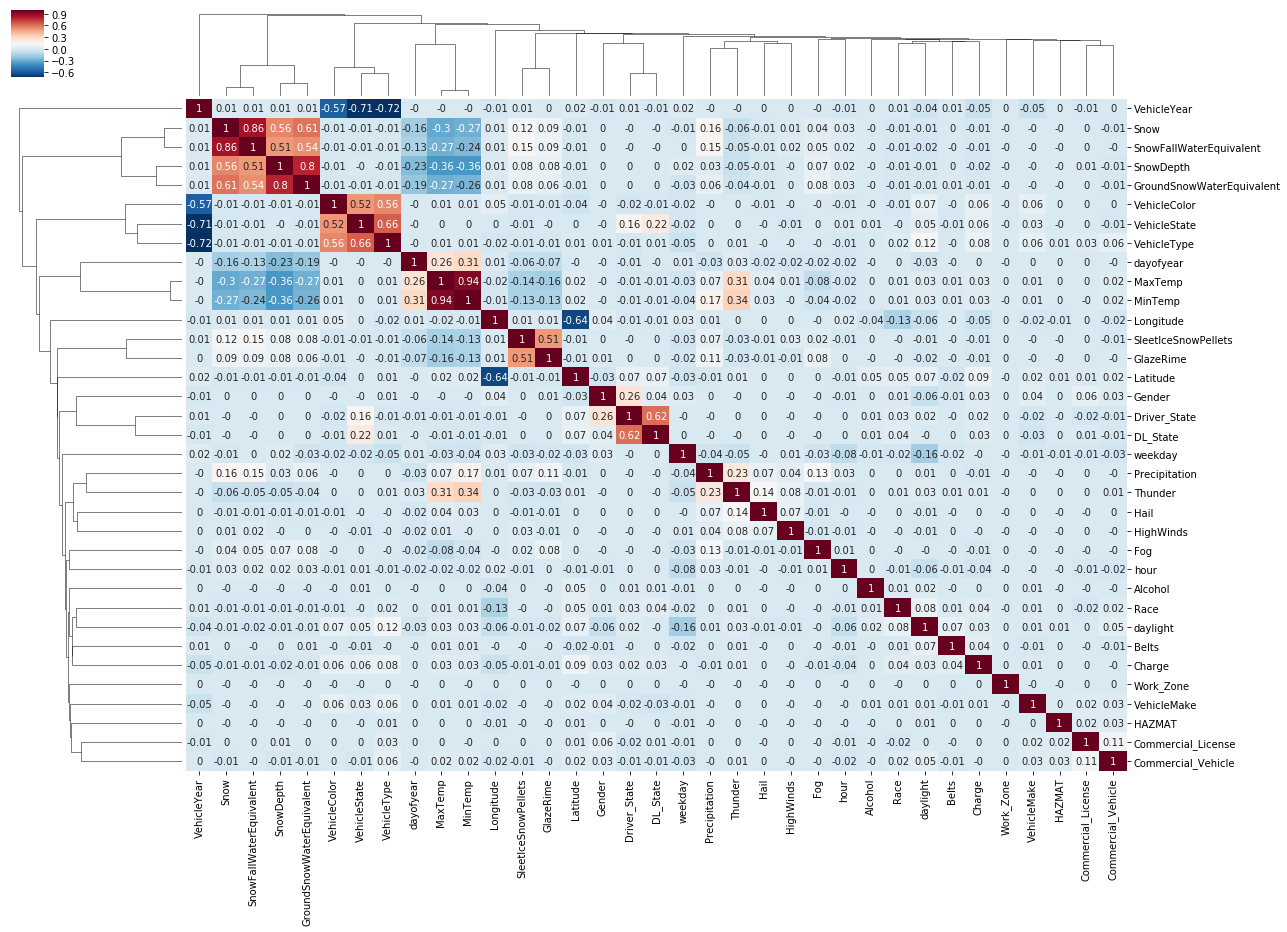

### Correlation Clustering, Magnitudes

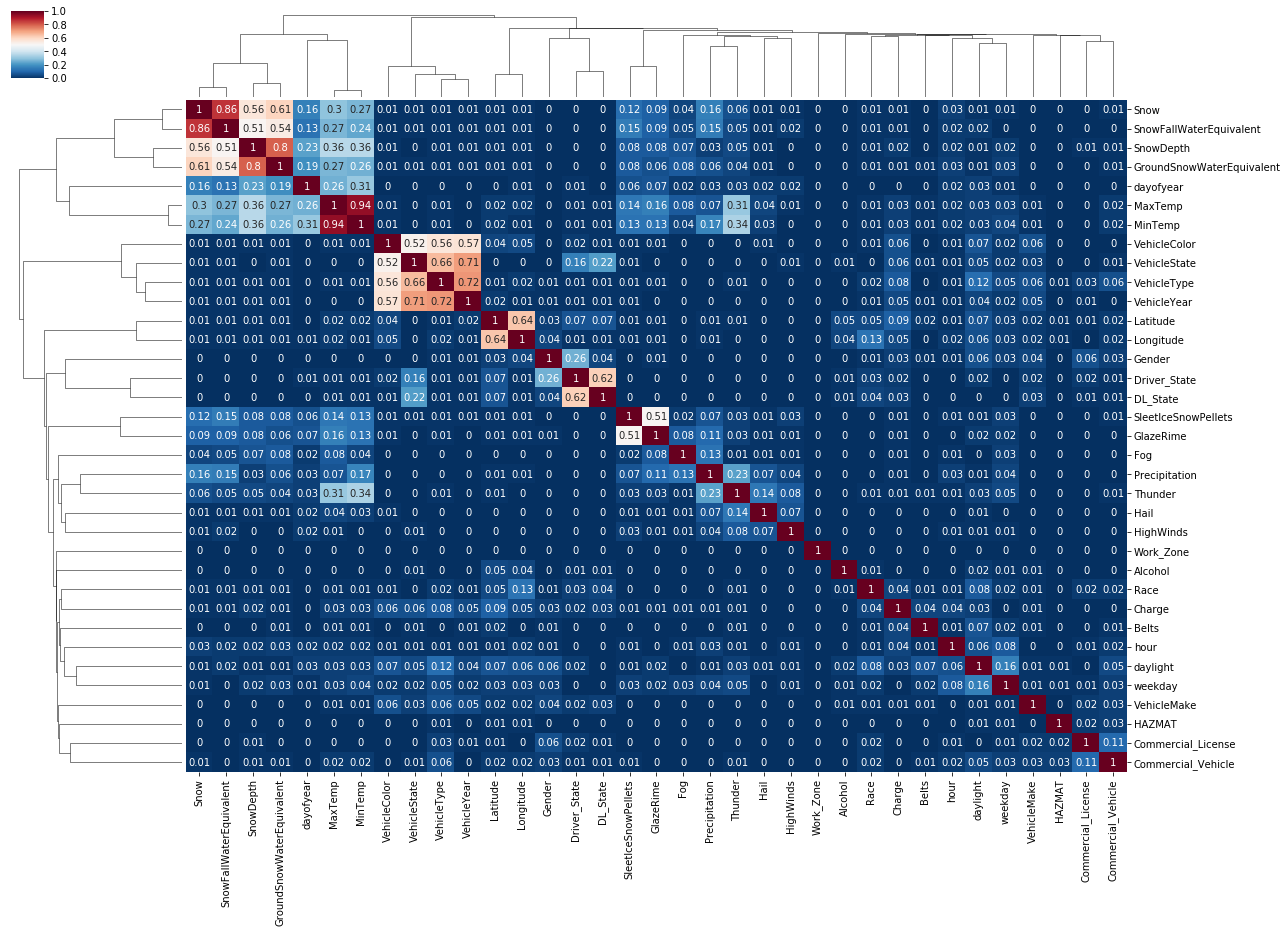

In [47]:
# First, let's look at a correlation clustering
display(Markdown('### Correlation Clustering'))
sns.clustermap(df.corr().round(2), annot=True, cmap='RdBu_r', figsize=(20, 14))
plt.show()

display(Markdown('### Correlation Clustering, Magnitudes'))
sns.clustermap(df.corr().abs().round(2), annot=True, cmap='RdBu_r', figsize=(20, 14))
plt.show()

From the above, we don't see a whole lot of correlation between the features, with the exception of the snowfall/ water content featuers, and those related to the vehicle.  Interestingly, latitutde/ longitude are somewhat anti-correlated, indicating perhaps the roads in Montgomery county are diagonal going from Northwest to Southeast.  Since this is not the clearest at showing what features we might drop, let's try some other feature selection methods.

In [48]:
# Since some of the methods are slow, let's take a sample of the
# data to speed them up (Note, I realize in reality, it would be better
# to not set the random state, but for the purposes of the assignment,
# I will always set it, so the results are reproducible)
df_sample = df.sample(frac=0.33, random_state=10)

In [49]:
# Let's try using mutal information to see if we can select a smaller
# subset of features
mutual_info = pd.Series(fs.mutual_info_classif(df_sample.drop(columns='Charge'), df_sample.Charge, random_state=10), index=df.columns[:-1])
mutual_info.sort_values(ascending=False)

Longitude                    0.183566
Latitude                     0.181580
hour                         0.046505
VehicleYear                  0.030750
daylight                     0.024567
Race                         0.023179
VehicleType                  0.014828
VehicleState                 0.014599
DL_State                     0.010336
Gender                       0.010109
Driver_State                 0.008390
VehicleMake                  0.007486
VehicleColor                 0.007037
dayofyear                    0.006864
Commercial_Vehicle           0.005417
weekday                      0.005166
Commercial_License           0.005123
MinTemp                      0.004271
Precipitation                0.004097
Snow                         0.003893
GroundSnowWaterEquivalent    0.003731
Belts                        0.003455
SnowDepth                    0.003343
SnowFallWaterEquivalent      0.003319
Thunder                      0.002803
Alcohol                      0.002704
MaxTemp     

In [50]:
# Considering the total amount of mutual information captured
# by these features, let's select to top features that capture
# 99% of the total amount of information content. But, considering
# the correlation values above, don't include
# SnowFallWaterEquivalent, SnowDepth, and MaxTemp from consideration
# (those in pairs of highly correlated features that contained
# less information than their pair.)
drop_cols = ['SnowFallWaterEquivalent', 'SnowDepth', 'MaxTemp']
mutual_info.drop(drop_cols).sort_values(ascending=False).cumsum() / mutual_info.drop(drop_cols).sum()

Longitude                    0.298646
Latitude                     0.594061
hour                         0.669720
VehicleYear                  0.719747
daylight                     0.759715
Race                         0.797425
VehicleType                  0.821550
VehicleState                 0.845301
DL_State                     0.862117
Gender                       0.878563
Driver_State                 0.892213
VehicleMake                  0.904393
VehicleColor                 0.915842
dayofyear                    0.927009
Commercial_Vehicle           0.935823
weekday                      0.944228
Commercial_License           0.952563
MinTemp                      0.959512
Precipitation                0.966177
Snow                         0.972511
GroundSnowWaterEquivalent    0.978581
Belts                        0.984202
Thunder                      0.988762
Alcohol                      0.993161
HighWinds                    0.995751
Fog                          0.997665
SleetIceSnow

In [51]:
# So, it looks like we will try everything below "Alcohol"
drop_cols = drop_cols + ['HighWinds', 'Fog', 'SleetIceSnowPellets', 'HAZMAT', 'Work_Zone', 'GlazeRime', 'Hail']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Now, split into train, test sets
train_df, test_df = train_test_split(df, random_state=10, shuffle=True, stratify=df.Charge)

In [52]:
# Confirm the split
train_df.shape, test_df.shape

((891084, 25), (297028, 25))

# Preliminary Data Model

In [53]:
# Now, train a naive bayes classifier
nb_mdl = GaussianNB()
nb_mdl.fit(train_df.drop(columns='Charge'), train_df.Charge)
nb_train_score = nb_mdl.score(train_df.drop(columns='Charge'), train_df.Charge)
nb_test_score = nb_mdl.score(test_df.drop(columns='Charge'), test_df.Charge)
print('Naive Bayes Training Accuracy: {}'.format(nb_train_score))
print('Naive Bayes Testing Accuracy: {}'.format(nb_test_score))

Naive Bayes Training Accuracy: 0.08705688801504684
Naive Bayes Testing Accuracy: 0.08760453559933744


In [54]:
# At least the model doesn't seem to be over-fitting (testing accuracy
# was higher than training accuracy)
# Let's see the proportion of times each of the target classes appears
df.Charge.value_counts(normalize=True)

0    0.181235
1    0.171276
3    0.171141
6    0.162521
5    0.151961
4    0.121463
2    0.040403
Name: Charge, dtype: float64

In [55]:
# So, we have 7 classes, with various frequencies.  A random
# classifier would have gotten an accuracy of
(df.Charge.value_counts(normalize=True) * df.Charge.value_counts(normalize=True)).sum()

0.15736173715937107

### Model Performance Evaluation/ Tweaks
We see from the above that a naive bayes multi-classifier didn't do so well (only 8 % of the samples identified correctly). Considering the number/ frequency of the different target Charges, though, this not as bad as we might initially think -- a random classifier (one that just assigns classes randomly based on their frequencies in our dataset) would have achieved an accuracy of 15.7% (our Naive Bayes classifier is performing worse than random chance, so this is still not a good sign ...)

There are not a lot of hyperparameters for Naive Bayes directly, so let's try using a stepwise feature selection technique to see if we can improve our performance, if we had a smaller number of features.

In [56]:
# First, grab all features
features = [x for x in df.columns if x != 'Charge']

# And define a train/ validation set
fs_train_df, fs_validate_df = train_test_split(train_df, random_state=10)

# Now, define function to perform stepwise forward feature selection
def forward_select(pre_selected=[], to_try=features, past_scores=dict()):
    """
    pre_selected {list} = list of features to include
    to_try {list} = list of features to, one-by-one, try including
        in the model to choose which adds highest accuracy.
    past_scores {dict} = keys=tuple of features, items=scores, to track
        the order of features added, and the accuracy at each level
    """
    
    # First, copy the pre_selected and to_try lists
    pre_selected = copy.copy(pre_selected)
    to_try = copy.copy(to_try)
    
    # Then, define the model
    mdl = GaussianNB()
    # and the dictionary to track scores
    scores = {}
    # Now go through and select all features
    for f in to_try:
        # Define set of features to try
        trial_f = pre_selected + [f]
        # Then fit the model
        mdl.fit(fs_train_df[trial_f], fs_train_df.Charge)
        scores[f] = mdl.score(fs_validate_df[trial_f], fs_validate_df.Charge)
        
    # Now that we've tried all the to_try features, find the max one
    max_score = max(scores.values())
    
    # Add the feature that maximized the score this iteration to the list
    pre_selected.append([k for k, v in scores.items() if v == max_score][0])
    
    # Store this set of features and their scores
    past_scores[tuple(pre_selected)] = max_score
    
    # remove the max scoring feature from the to_try
    to_try.remove(pre_selected[-1])
    
    # If to_try doesn't have any more items, then return the past_scores
    if len(to_try) == 0:
        return past_scores
    else:
        # Still need to try calculating with more features
        return forward_select(pre_selected=pre_selected, to_try=to_try, past_scores=past_scores)

In [57]:
# Now, run our forward selection function
fs_results = forward_select()
fs_results

{('hour',): 0.219763793312415,
 ('hour', 'Latitude'): 0.22754757127274197,
 ('hour', 'Latitude', 'daylight'): 0.2381234541300259,
 ('hour', 'Latitude', 'daylight', 'VehicleMake'): 0.2398202638584017,
 ('hour',
  'Latitude',
  'daylight',
  'VehicleMake',
  'Longitude'): 0.24136893940414147,
 ('hour',
  'Latitude',
  'daylight',
  'VehicleMake',
  'Longitude',
  'weekday'): 0.24380193113107182,
 ('hour',
  'Latitude',
  'daylight',
  'VehicleMake',
  'Longitude',
  'weekday',
  'dayofyear'): 0.24434060088611176,
 ('hour',
  'Latitude',
  'daylight',
  'VehicleMake',
  'Longitude',
  'weekday',
  'dayofyear',
  'MinTemp'): 0.24460095793438105,
 ('hour',
  'Latitude',
  'daylight',
  'VehicleMake',
  'Longitude',
  'weekday',
  'dayofyear',
  'MinTemp',
  'Precipitation'): 0.24456953553200372,
 ('hour',
  'Latitude',
  'daylight',
  'VehicleMake',
  'Longitude',
  'weekday',
  'dayofyear',
  'MinTemp',
  'Precipitation',
  'Race'): 0.24335752858316387,
 ('hour',
  'Latitude',
  'daylight'

Perhaps to be expected, our accuracy in the validation set first increased with increasing features, then over time, was overwhelmed with irrelevant features, and so it decreased.  What is impressive is that, even with just one feature (hour), we were able to achieve 22% accuracy!  Let's check our validation in our test data, using the set of features that maximized accuracy in our validation set.

In [58]:
# First, find the set of features that maximized validation accuracy
temp = [k for k, v in fs_results.items() if v == max(fs_results.values())]
temp

[('hour',
  'Latitude',
  'daylight',
  'VehicleMake',
  'Longitude',
  'weekday',
  'dayofyear',
  'MinTemp',
  'Precipitation',
  'Race',
  'DL_State',
  'Belts',
  'Commercial_License')]

In [59]:
# So, we find the above features maximized the validation accuracy.
# Using these to train/ test the model again:
best_forward_features = list(temp[0])
nb_mdl = GaussianNB()
nb_mdl.fit(train_df[best_forward_features], train_df.Charge)
nb_train_score = nb_mdl.score(train_df[best_forward_features], train_df.Charge)
nb_test_score = nb_mdl.score(test_df[best_forward_features], test_df.Charge)
print('Naive Bayes Training Accuracy: {}'.format(nb_train_score))
print('Naive Bayes Testing Accuracy: {}'.format(nb_test_score))

Naive Bayes Training Accuracy: 0.24594089895004287
Naive Bayes Testing Accuracy: 0.24688918216464442


In [60]:
# Looks quite a bit better!  For comparison, let's
# try backward selecting features (dropping those
# that least improve the accuracy), to see how the best
# features from there compare with our foward selection set

def backward_select(to_try=features, past_scores=dict()):
    """
    to_try {list} = list of features to, one-by-one, try removing
        from to choose which improves the accuracy the least
    past_scores {dict} = keys=tuple of features, items=scores, to track
        the order of features removed, and the accuracy at each level
    """
    
    # First, make a copy of to_try
    to_try = copy.copy(to_try)
    
    # Then, define the model
    mdl = GaussianNB()
    # and the dictionary to track scores
    scores = {}
    # Now go through and select all features
    for f in to_try:
        # Define set of features to try
        trial_f = [x for x in to_try if x != f]
        # Then fit the model
        mdl.fit(fs_train_df[trial_f], fs_train_df.Charge)
        scores[f] = mdl.score(fs_validate_df[trial_f], fs_validate_df.Charge)
        
    # Now that we've tried all the to_try features, find the one
    # where, with it removed, we had the maximum score
    max_score = max(scores.values())
    
    # Find which feature removal resulted in the max score
    feature_to_remove = [k for k, v in scores.items() if v == max_score][0]
    
    # Remove this feature from the list of remaining
    to_try.remove(feature_to_remove)
    
    # Store this set of remaining features and their score
    past_scores[tuple(to_try)] = max_score
    
    # If to_try only has one item left, then return the past_scores
    if len(to_try) == 1:
        return past_scores
    else:
        # Still need to try calculating with more features
        return backward_select(to_try=to_try, past_scores=past_scores)

In [61]:
# Now, try backward selection
bs_results = backward_select()
bs_results

{('Latitude',
  'Longitude',
  'Belts',
  'Commercial_License',
  'Commercial_Vehicle',
  'VehicleState',
  'VehicleType',
  'VehicleYear',
  'VehicleMake',
  'VehicleColor',
  'Race',
  'Gender',
  'Driver_State',
  'DL_State',
  'Precipitation',
  'Snow',
  'MinTemp',
  'GroundSnowWaterEquivalent',
  'Thunder',
  'daylight',
  'dayofyear',
  'weekday',
  'hour'): 0.0863891619645286,
 ('Latitude',
  'Longitude',
  'Belts',
  'Commercial_License',
  'Commercial_Vehicle',
  'VehicleType',
  'VehicleYear',
  'VehicleMake',
  'VehicleColor',
  'Race',
  'Gender',
  'Driver_State',
  'DL_State',
  'Precipitation',
  'Snow',
  'MinTemp',
  'GroundSnowWaterEquivalent',
  'Thunder',
  'daylight',
  'dayofyear',
  'weekday',
  'hour'): 0.21686844337907538,
 ('Latitude',
  'Longitude',
  'Belts',
  'Commercial_License',
  'Commercial_Vehicle',
  'VehicleType',
  'VehicleMake',
  'VehicleColor',
  'Race',
  'Gender',
  'Driver_State',
  'DL_State',
  'Precipitation',
  'Snow',
  'MinTemp',
  'Gr

In [62]:
# Similarly, let's select the set of features
# that resulted in the maximum score
temp = [k for k, v in fs_results.items() if v == max(fs_results.values())]
temp

[('hour',
  'Latitude',
  'daylight',
  'VehicleMake',
  'Longitude',
  'weekday',
  'dayofyear',
  'MinTemp',
  'Precipitation',
  'Race',
  'DL_State',
  'Belts',
  'Commercial_License')]

In [63]:
# And run our tests on the test set
best_backward_features = list(temp[0])
nb_mdl = GaussianNB()
nb_mdl.fit(train_df[best_backward_features], train_df.Charge)
nb_train_score = nb_mdl.score(train_df[best_backward_features], train_df.Charge)
nb_test_score = nb_mdl.score(test_df[best_backward_features], test_df.Charge)
print('Naive Bayes Training Accuracy: {}'.format(nb_train_score))
print('Naive Bayes Testing Accuracy: {}'.format(nb_test_score))

Naive Bayes Training Accuracy: 0.24594089895004287
Naive Bayes Testing Accuracy: 0.24688918216464442


In [64]:
# we are getting the same accuracy, probably have the same list?
# Let's check
pd.DataFrame([sorted(best_backward_features), sorted(best_forward_features)], index=['best_backward', 'best_forward'])

,0,1,2,3,4,5,6,7,8,9,10,11,12
best_backward,Belts,Commercial_License,DL_State,Latitude,Longitude,MinTemp,Precipitation,Race,VehicleMake,daylight,dayofyear,hour,weekday
best_forward,Belts,Commercial_License,DL_State,Latitude,Longitude,MinTemp,Precipitation,Race,VehicleMake,daylight,dayofyear,hour,weekday


So, it looks like this is truly our best set of features (same set selected with forward or backward step-wise selection).  Interesting for demographic information, gender did not survive, but sadly, race did.  Also, VehicleMake was pretty high in feature importance using either method, which was perhaps unexpected -- it will be interesting to see how this feature relates to the different charges made.  Also, in both methods, the single most important feature came out to be the time of day the charge was made at (hour).  This perhaps makes sense based off of the fact that some charges (LightLampSignalDefect, for example) are easier to make at night/ when it is dark, while others (ImproperPlatesRegistration or OtherDefect, for example) are easier done during the day/ during daylight ours.  Also, some traffic violations are probably easier to charge when there is less traffic (not rush hour), such as Speeding/ RulesOfRoad_Other.

Conclusions:
Although our out-of-the-box Naive bayes classifier didn't perform too well with all the features we gave it (~8% accuracy, less than a random classifier, which achieves ~15% accuracy), by taking additional measures to improve our set of features, we were able to improve accuracy up to 24.7% 

# Improved Machine Learning Model(s)
Here we only tested a naive bayes classifier, which is a fairly straight-forward model.  For future work, we could try out some of the other classifiers to see how they perform, such as:
* Logistic Regression
* Support Vector Machine Classifier
* Random Forest Classifier

Of these, I would predict SVM's and the Random Forest methods would particularly perform better as they can not only capture non-linear relationships, but for the RF method, it is also an ensembl technique so is further protected from over-fitting.

In [65]:
# For transition to the final phase of the project, let's dump
# our final cleaned dataframe with just the best features
#df[best_forward_features + ['Charge']].to_csv('KenjiOman-M03-Capstone-FinalData.csv.gz', index=False, compression='gzip')